# Clustering Project 



## Part A — K-Means Notebook (Original Cells)
---

In [345]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [346]:
import warnings
warnings.filterwarnings('ignore')

In [347]:
DATA_PATH = "BigMart _Sales_Data.csv"

df = pd.read_csv(DATA_PATH)

print("Dataset Shape:", df.shape)


Dataset Shape: (8523, 12)


In [348]:
df.shape

(8523, 12)

In [349]:
df.head(210)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0             FDA15         9.30          Low Fat         0.016047   
1             DRC01         5.92          Regular         0.019278   
2             FDN15        17.50          Low Fat         0.016760   
3             FDX07        19.20          Regular         0.000000   
4             NCD19         8.93          Low Fat         0.000000   
..              ...          ...              ...              ...   
205           FDF24        15.50          Regular         0.042465   
206           FDG52        13.65          Low Fat         0.065733   
207           DRF36        16.10               LF         0.023625   
208           FDS45          NaN          Regular         0.051644   
209           FDX40        12.85          Low Fat         0.165694   

                 Item_Type  Item_MRP Outlet_Identifier  \
0                    Dairy  249.8092            OUT049   
1              Soft Drinks   48.2692            OUT018   
2                     Meat  141.6180            OUT049   
3    Fruits and Vegetables  182.0950            OUT010   
4                Household   53.8614            OUT013   
..                     ...       ...               ...   
205           Baking Goods   81.5934            OUT010   
206           Frozen Foods   45.7402            OUT049   
207            Soft Drinks  189.3846            OUT045   
208            Snack Foods  107.3622            OUT019   
209           Frozen Foods   39.7164            OUT010   

     Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                         1999      Medium               Tier 1   
1                         2009      Medium               Tier 3   
2                         1999      Medium               Tier 1   
3                         1998         NaN               Tier 3   
4                         1987        High               Tier 3   
..                         ...         ...                  ...   
205                       1998         NaN               Tier 3   
206                       1999      Medium               Tier 1   
207                       2002         NaN               Tier 2   
208                       1985       Small               Tier 1   
209                       1998         NaN               Tier 3   

           Outlet_Type  Item_Outlet_Sales  
0    Supermarket Type1          3735.1380  
1    Supermarket Type2           443.4228  
2    Supermarket Type1          2097.2700  
3        Grocery Store           732.3800  
4    Supermarket Type1           994.7052  
..                 ...                ...  
205      Grocery Store           327.5736  
206  Supermarket Type1           780.9834  
207  Supermarket Type1          3630.6074  
208      Grocery Store           317.5866  
209      Grocery Store           231.6984  

[210 rows x 12 columns]

In [350]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


In [351]:
df.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [352]:
print("\nMissing values per column:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())


Missing values per column:
 Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Duplicates: 0


In [353]:
#FE
CURRENT_YEAR = 2025
df['Outlet_Age'] = CURRENT_YEAR - df['Outlet_Establishment_Year']
df[['Outlet_Establishment_Year', 'Outlet_Age']].head()

Outlet_Establishment_Year  Outlet_Age
0                       1999          26
1                       2009          16
2                       1999          26
3                       1998          27
4                       1987          38

In [354]:
# coulmns that will be used during clustring
num_cols = ['Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
cat_cols = [ 'Item_Fat_Content	','Item_Type', 'Outlet_Size','Outlet_Type','Outlet_Location_Type']

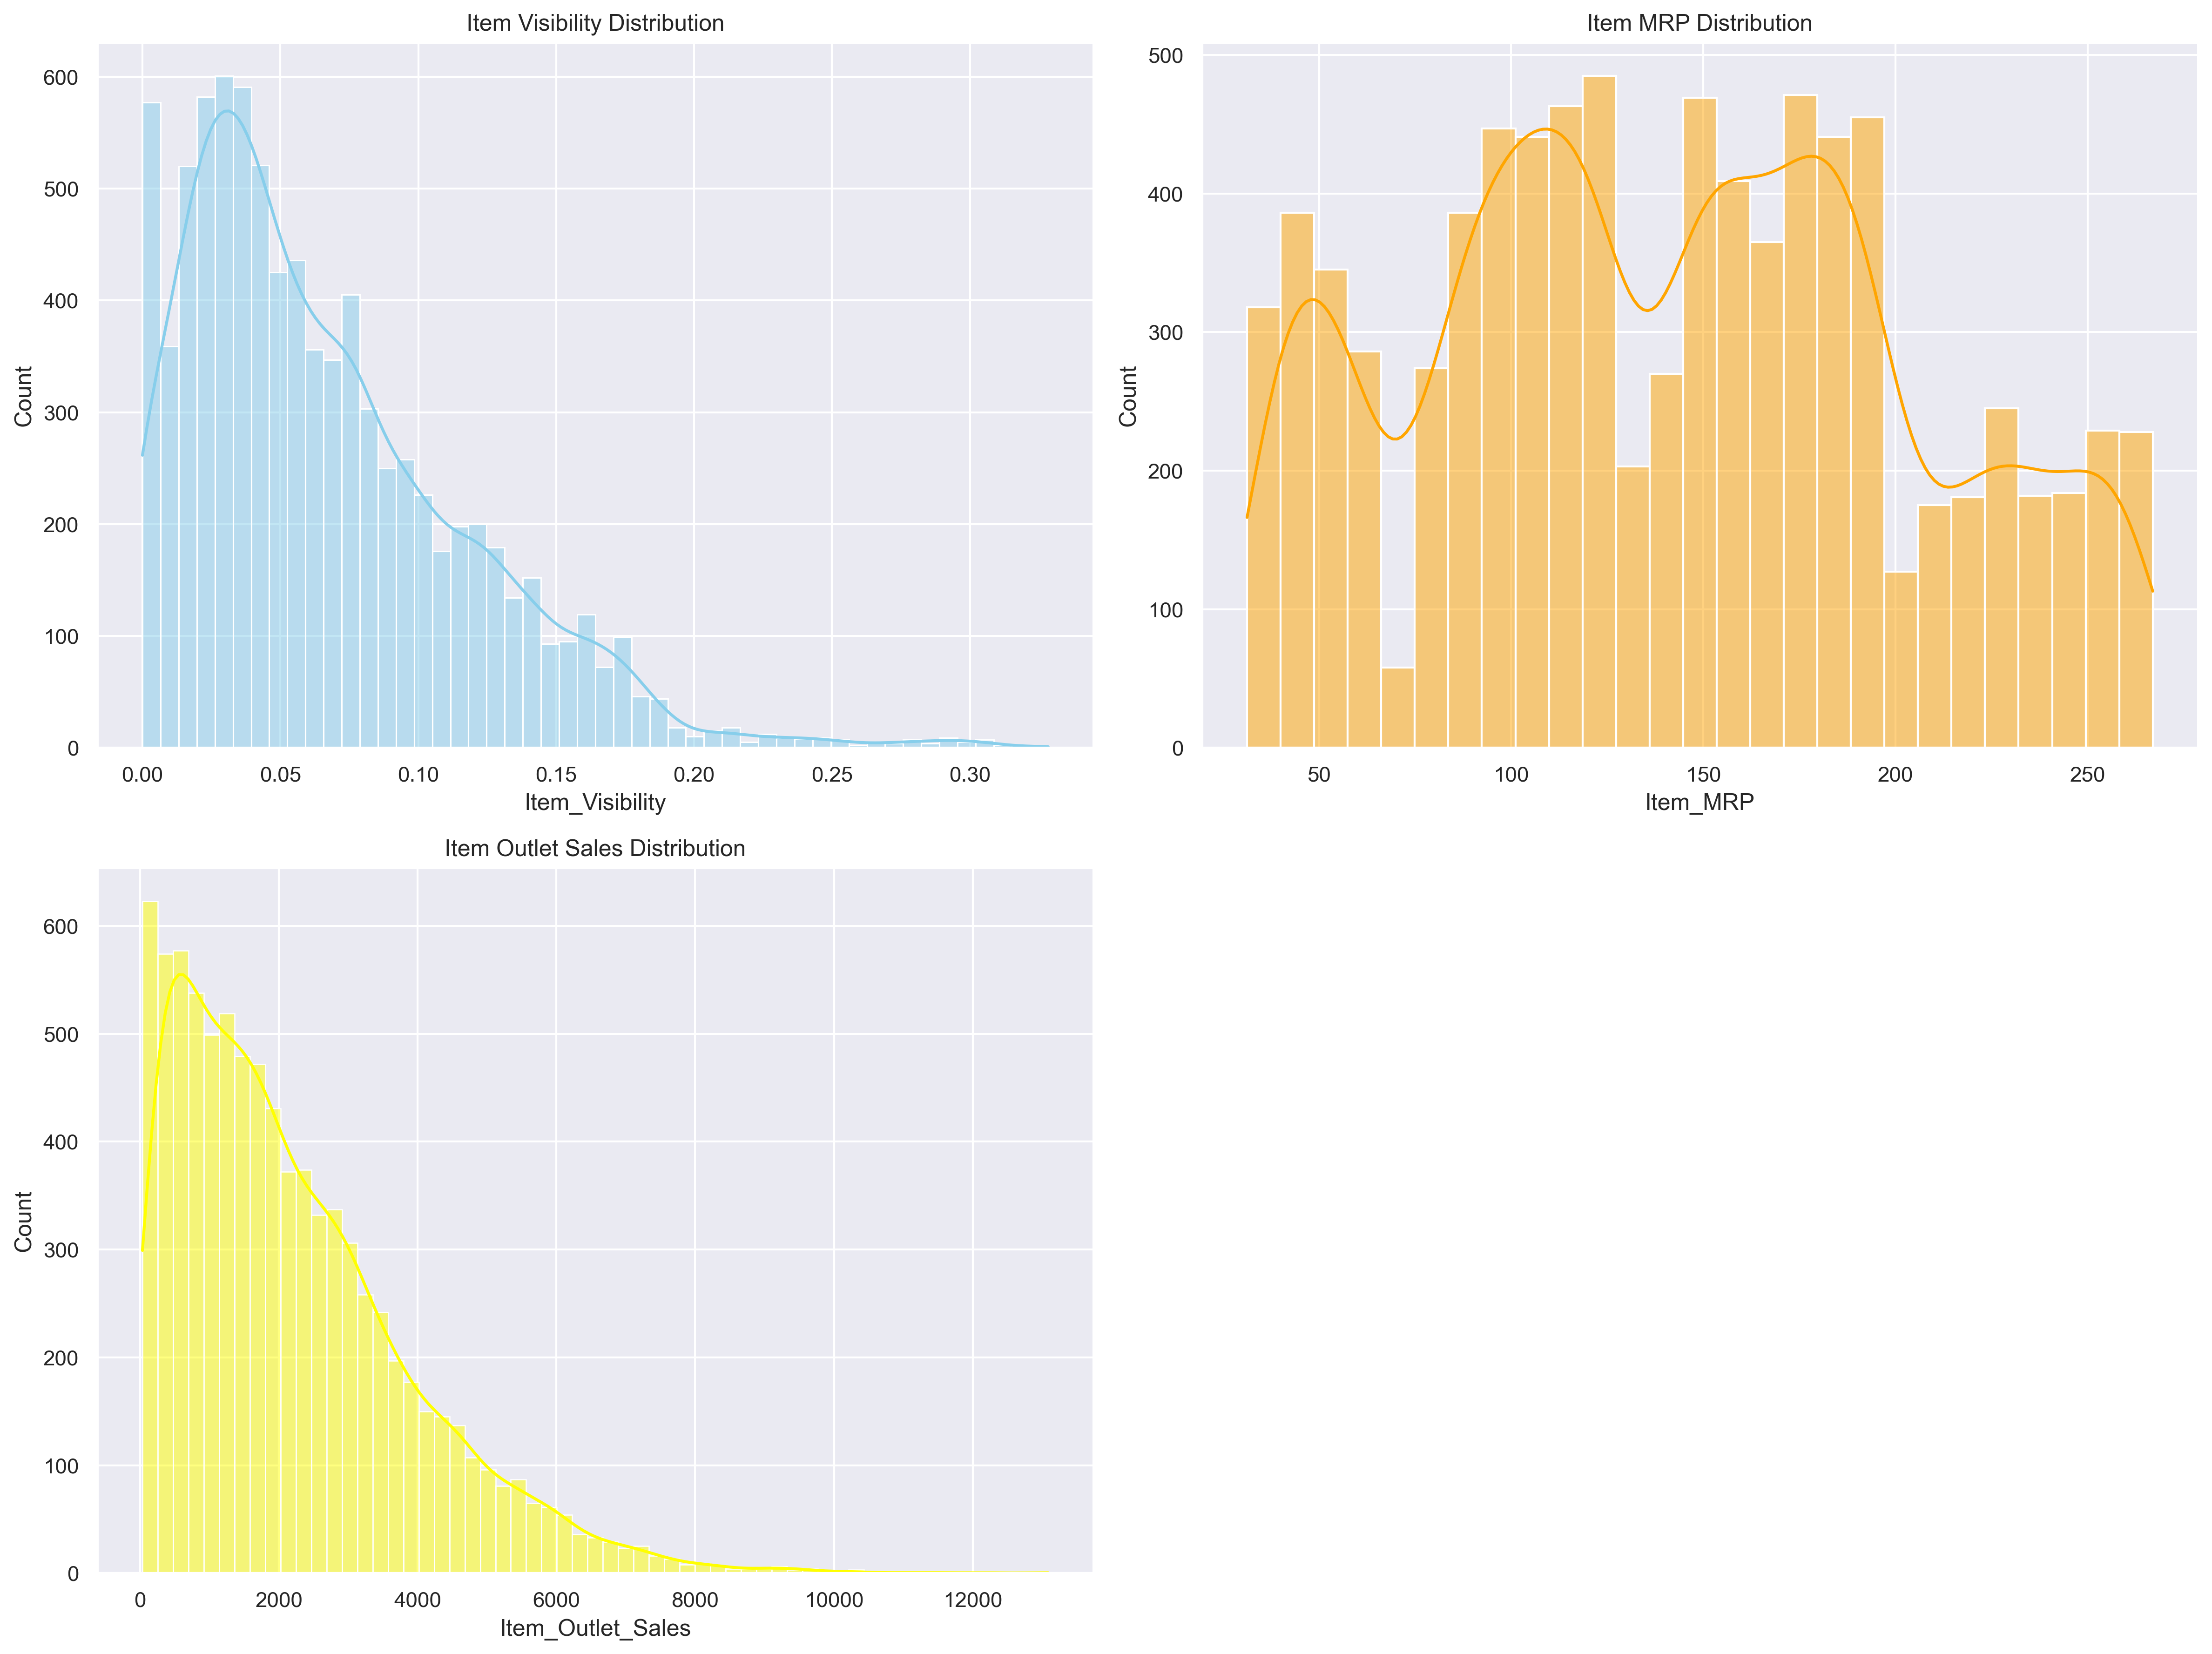

In [355]:
#  before scaling
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs = axs.flatten()
sns.histplot(data=df, x="Item_Visibility", kde=True, ax=axs[0], color='skyblue')
axs[0].set_title("Item Visibility Distribution")
sns.histplot(data=df, x="Item_MRP", kde=True, ax=axs[1], color='orange')
axs[1].set_title("Item MRP Distribution")
sns.histplot(data=df, x="Item_Outlet_Sales", kde=True, ax=axs[2], color='yellow')
axs[2].set_title("Item Outlet Sales Distribution")
axs[3].axis('off')
plt.tight_layout()
plt.show()




Text(0.5, 1.0, 'Correlation Heatmap')

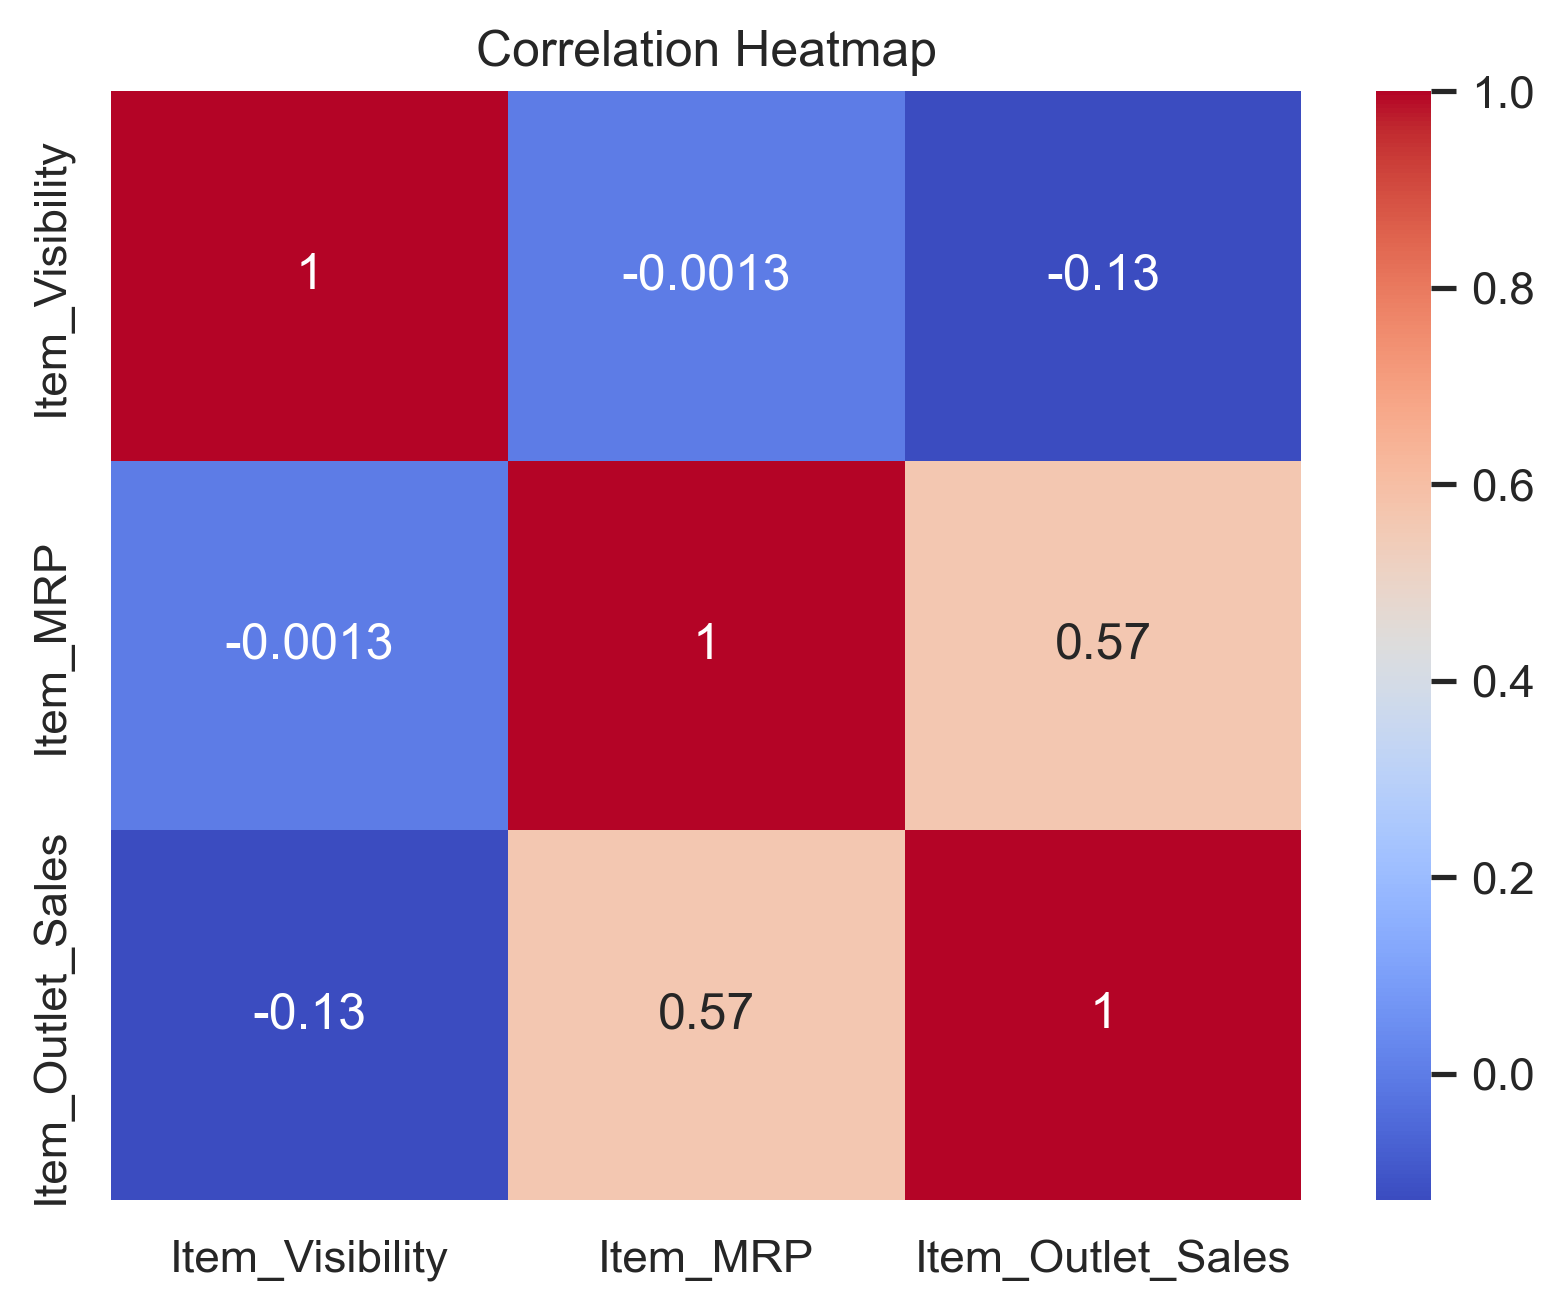

In [356]:
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")

In [357]:
# Handling zero values in 'Item_Visibility'
df['Item_Visibility'] = df['Item_Visibility'].replace(0, pd.NA)

df['Item_Visibility'] = df.groupby('Item_Type')['Item_Visibility'].transform(
    lambda x: x.fillna(x.median())
)

(df['Item_Visibility'] == 0).sum(), df['Item_Visibility'].isnull().sum()



(0, 0)

In [358]:
# Fill Item_Weight by mean weight per Item_Identifier, else by Item_Type mean
df['Item_Weight'] = df.groupby('Item_Identifier')['Item_Weight'].transform(
    lambda x: x.fillna(x.mean())
)
df['Item_Weight'] = df.groupby('Item_Type')['Item_Weight'].transform(
    lambda x: x.fillna(x.mean())
)

# Confirm
df['Item_Weight'].isnull().sum()



0

In [359]:
df.Outlet_Size.value_counts(dropna=False)

Outlet_Size
Medium    2793
NaN       2410
Small     2388
High       932
Name: count, dtype: int64

In [360]:
# Fill Outlet_Size by mode per Outlet_Type
def fill_outlet_size(group):
    mode = group.mode()
    if len(mode) > 0:
        return group.fillna(mode[0])
    else:
        return group.fillna('Medium')  # fallback

df['Outlet_Size'] = df.groupby('Outlet_Type')['Outlet_Size'].transform(fill_outlet_size)

# Confirm
df['Outlet_Size'].isnull().sum(), df['Outlet_Size'].value_counts()

(0,
 Outlet_Size
 Small     4798
 Medium    2793
 High       932
 Name: count, dtype: int64)

In [361]:
#check nulls
df.isnull().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Outlet_Age                   0
dtype: int64

In [362]:
# before standerization
df['Item_Fat_Content'].value_counts()


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [363]:
#standerization
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()


Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [364]:
df.head(210)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0             FDA15        9.300          Low Fat         0.016047   
1             DRC01        5.920          Regular         0.019278   
2             FDN15       17.500          Low Fat         0.016760   
3             FDX07       19.200          Regular         0.058778   
4             NCD19        8.930          Low Fat         0.049017   
..              ...          ...              ...              ...   
205           FDF24       15.500          Regular         0.042465   
206           FDG52       13.650          Low Fat         0.065733   
207           DRF36       16.100          Low Fat         0.023625   
208           FDS45        5.175          Regular         0.051644   
209           FDX40       12.850          Low Fat         0.165694   

                 Item_Type  Item_MRP Outlet_Identifier  \
0                    Dairy  249.8092            OUT049   
1              Soft Drinks   48.2692            OUT018   
2                     Meat  141.6180            OUT049   
3    Fruits and Vegetables  182.0950            OUT010   
4                Household   53.8614            OUT013   
..                     ...       ...               ...   
205           Baking Goods   81.5934            OUT010   
206           Frozen Foods   45.7402            OUT049   
207            Soft Drinks  189.3846            OUT045   
208            Snack Foods  107.3622            OUT019   
209           Frozen Foods   39.7164            OUT010   

     Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                         1999      Medium               Tier 1   
1                         2009      Medium               Tier 3   
2                         1999      Medium               Tier 1   
3                         1998       Small               Tier 3   
4                         1987        High               Tier 3   
..                         ...         ...                  ...   
205                       1998       Small               Tier 3   
206                       1999      Medium               Tier 1   
207                       2002       Small               Tier 2   
208                       1985       Small               Tier 1   
209                       1998       Small               Tier 3   

           Outlet_Type  Item_Outlet_Sales  Outlet_Age  
0    Supermarket Type1          3735.1380          26  
1    Supermarket Type2           443.4228          16  
2    Supermarket Type1          2097.2700          26  
3        Grocery Store           732.3800          27  
4    Supermarket Type1           994.7052          38  
..                 ...                ...         ...  
205      Grocery Store           327.5736          27  
206  Supermarket Type1           780.9834          26  
207  Supermarket Type1          3630.6074          23  
208      Grocery Store           317.5866          40  
209      Grocery Store           231.6984          27  

[210 rows x 13 columns]

In [365]:
#detect outlier
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers)} outliers")

Item_Visibility: 173 outliers
Item_MRP: 0 outliers
Item_Outlet_Sales: 186 outliers


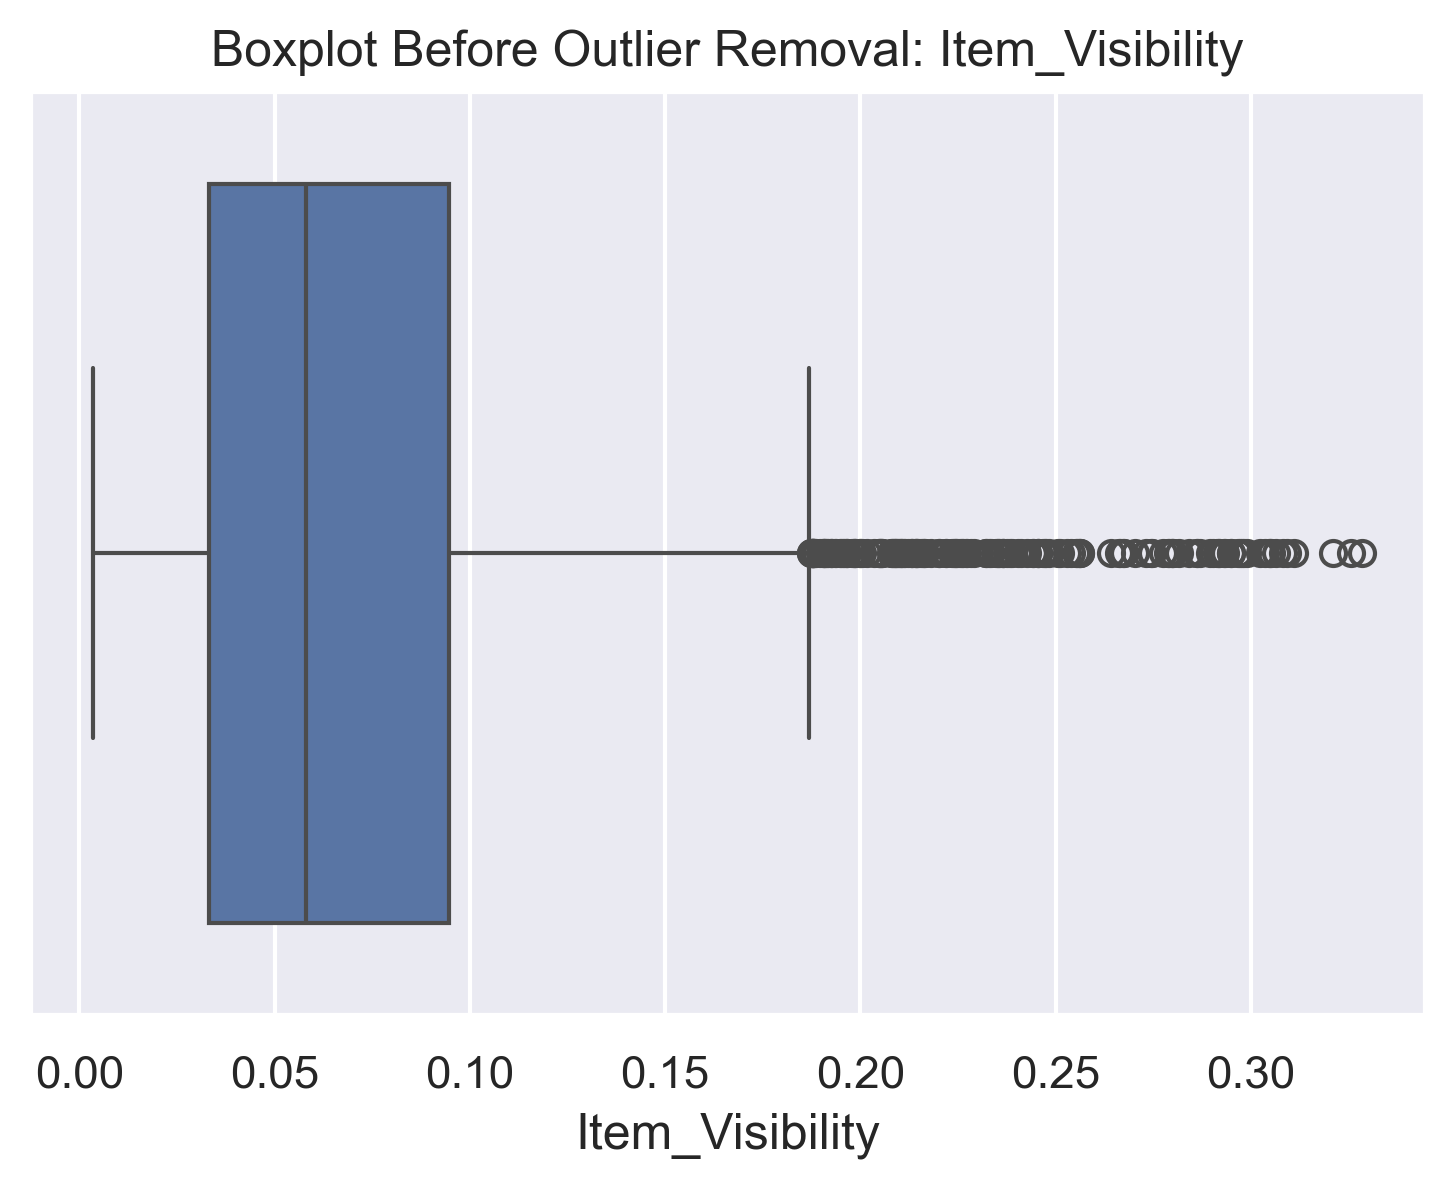

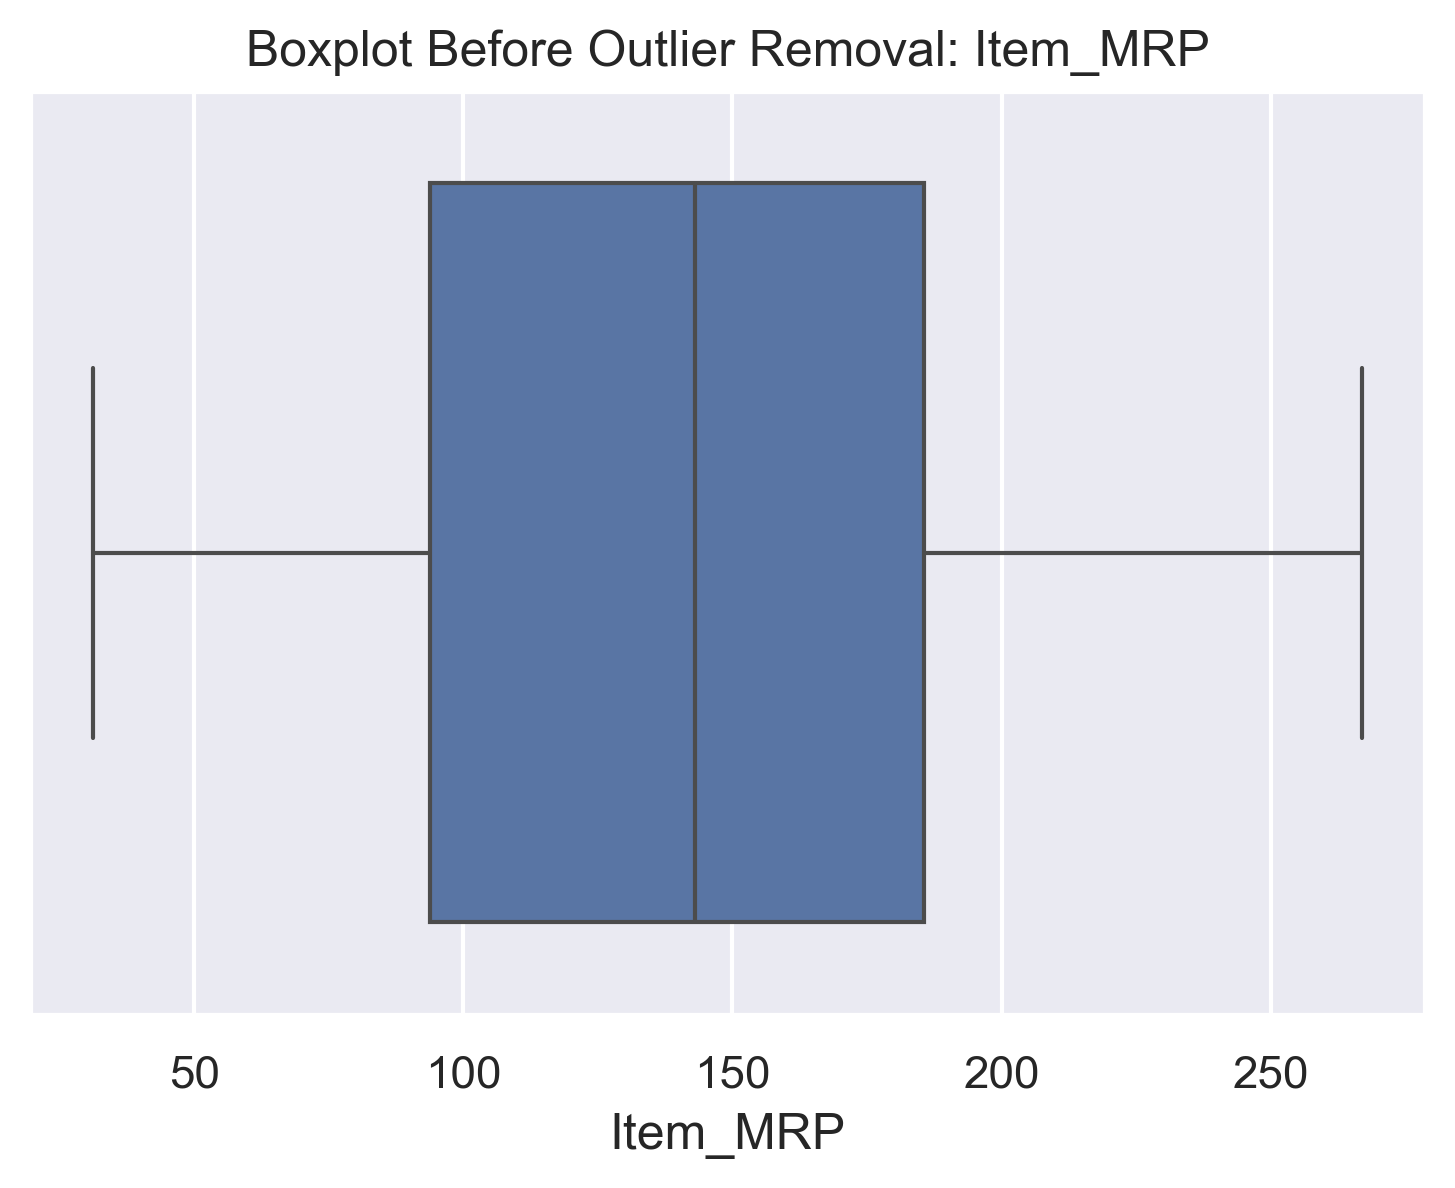

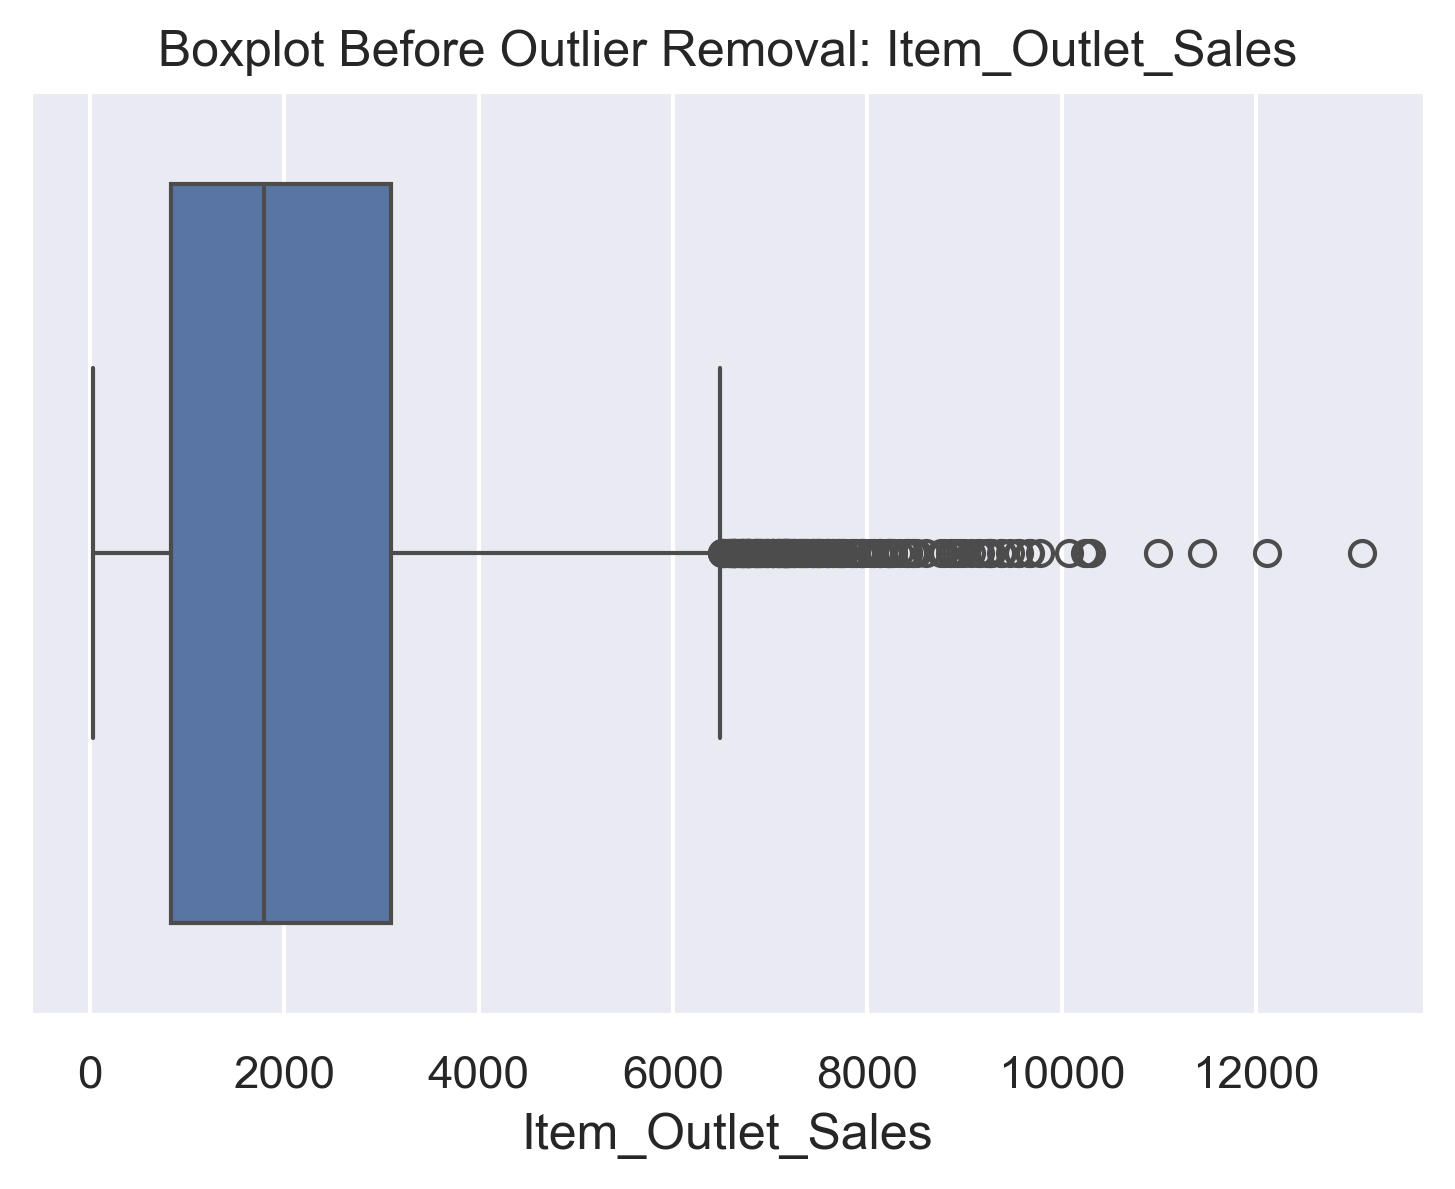

In [366]:
# Visualize before handling outlier 
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot Before Outlier Removal: {col}")
    plt.show()

In [367]:
#using clip 
import numpy as np
outlier_cols = ['Item_Visibility', 'Item_Outlet_Sales']

for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
for col in outlier_cols:
    print(f"{col} after capping:")
    print(df[col].describe(), "\n")
# or using iqr method
# outlier_cols = ['Item_Visibility', 'Item_Outlet_Sales']

#for col in outlier_cols:
  #  median = df[col].median()
    #df[col] = np.where(
       # (df[col] < df[col].quantile(0.25) - 1.5*(df[col].quantile(0.75)-df[col].quantile(0.25))) |
       # (df[col] > df[col].quantile(0.75) + 1.5*(df[col].quantile(0.75)-df[col].quantile(0.25))),
       # median,
        #df[col])

Item_Visibility after capping:
count    8523.000000
mean        0.068681
std         0.045550
min         0.003575
25%         0.033085
50%         0.058034
75%         0.094585
max         0.186835
Name: Item_Visibility, dtype: float64 

Item_Outlet_Sales after capping:
count    8523.000000
mean     2156.313016
std      1624.863069
min        33.290000
25%       834.247400
50%      1794.331000
75%      3101.296400
max      6501.869900
Name: Item_Outlet_Sales, dtype: float64 



In [368]:
#detect outlier
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers)} outliers")

Item_Visibility: 0 outliers
Item_MRP: 0 outliers
Item_Outlet_Sales: 0 outliers


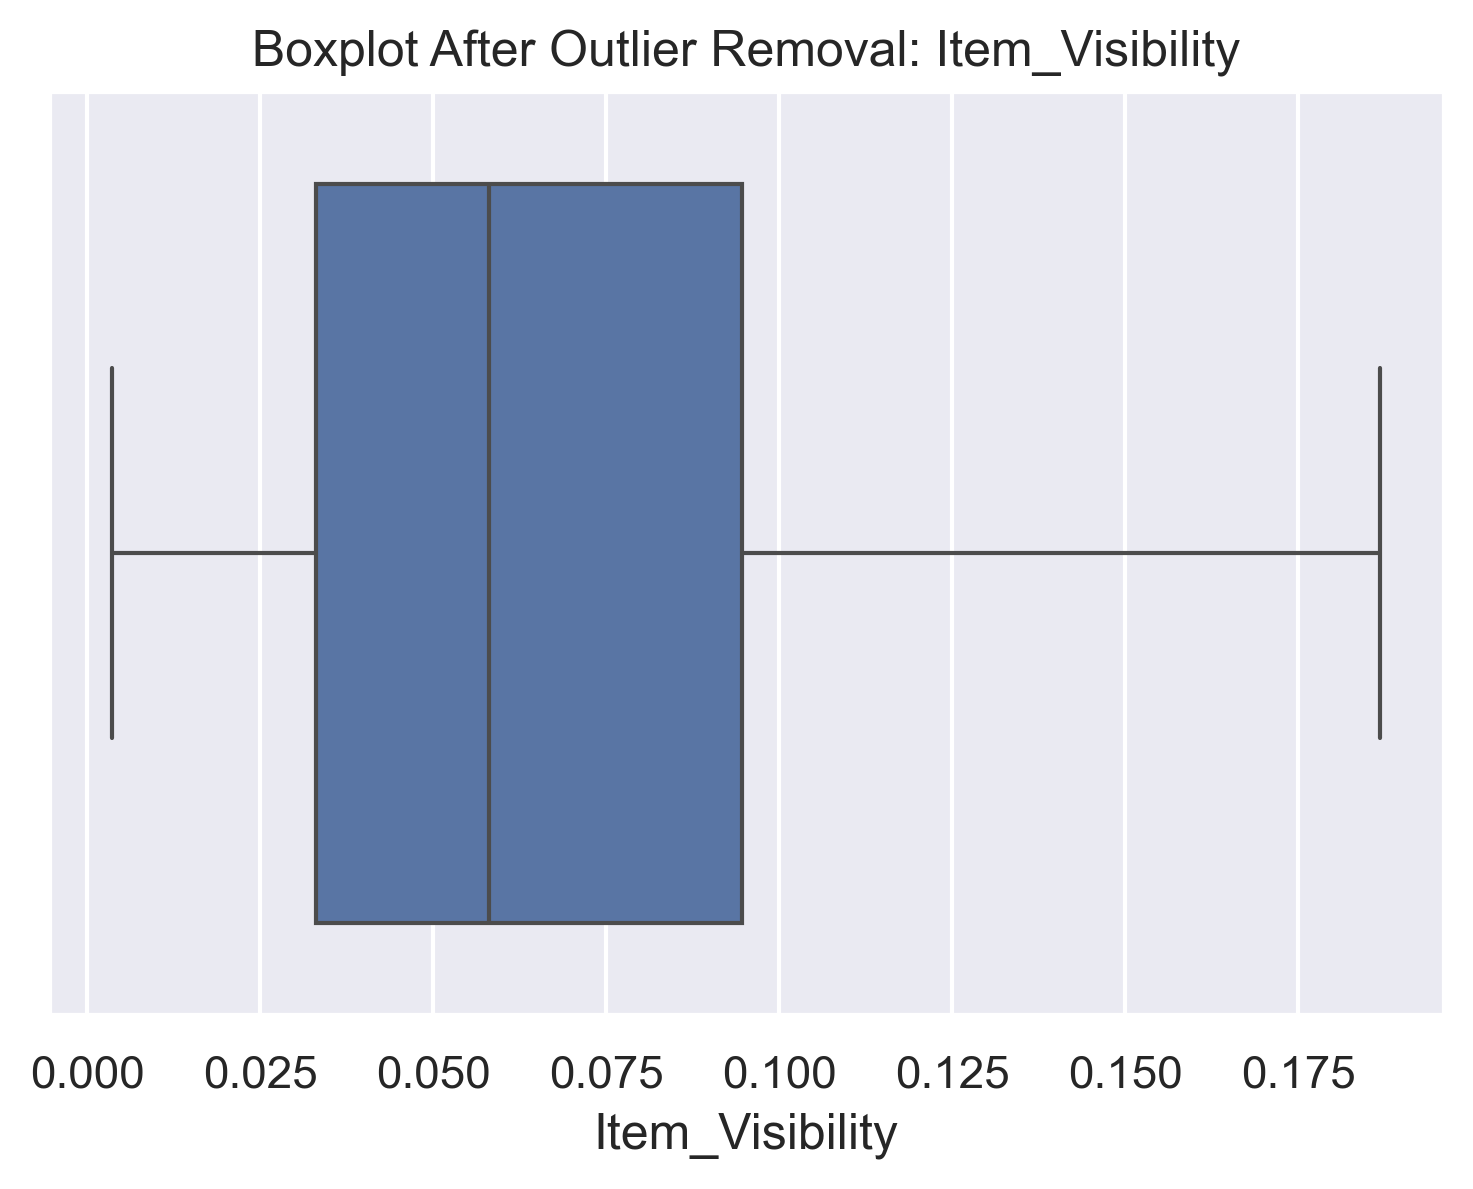

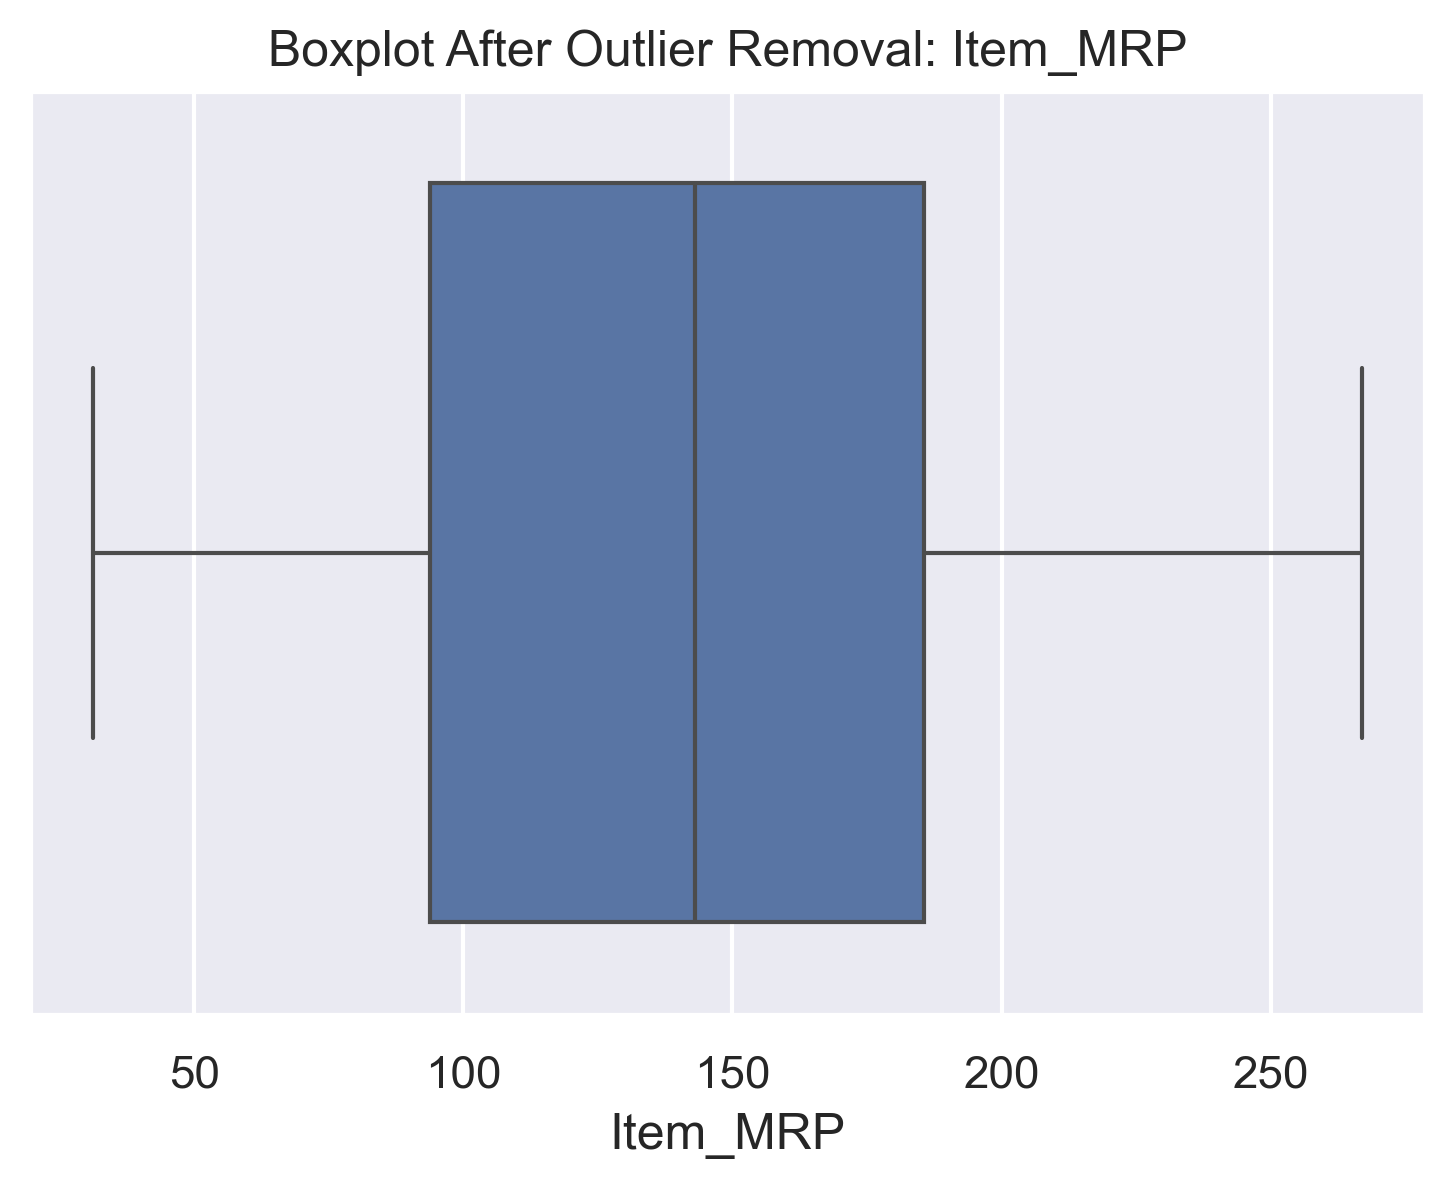

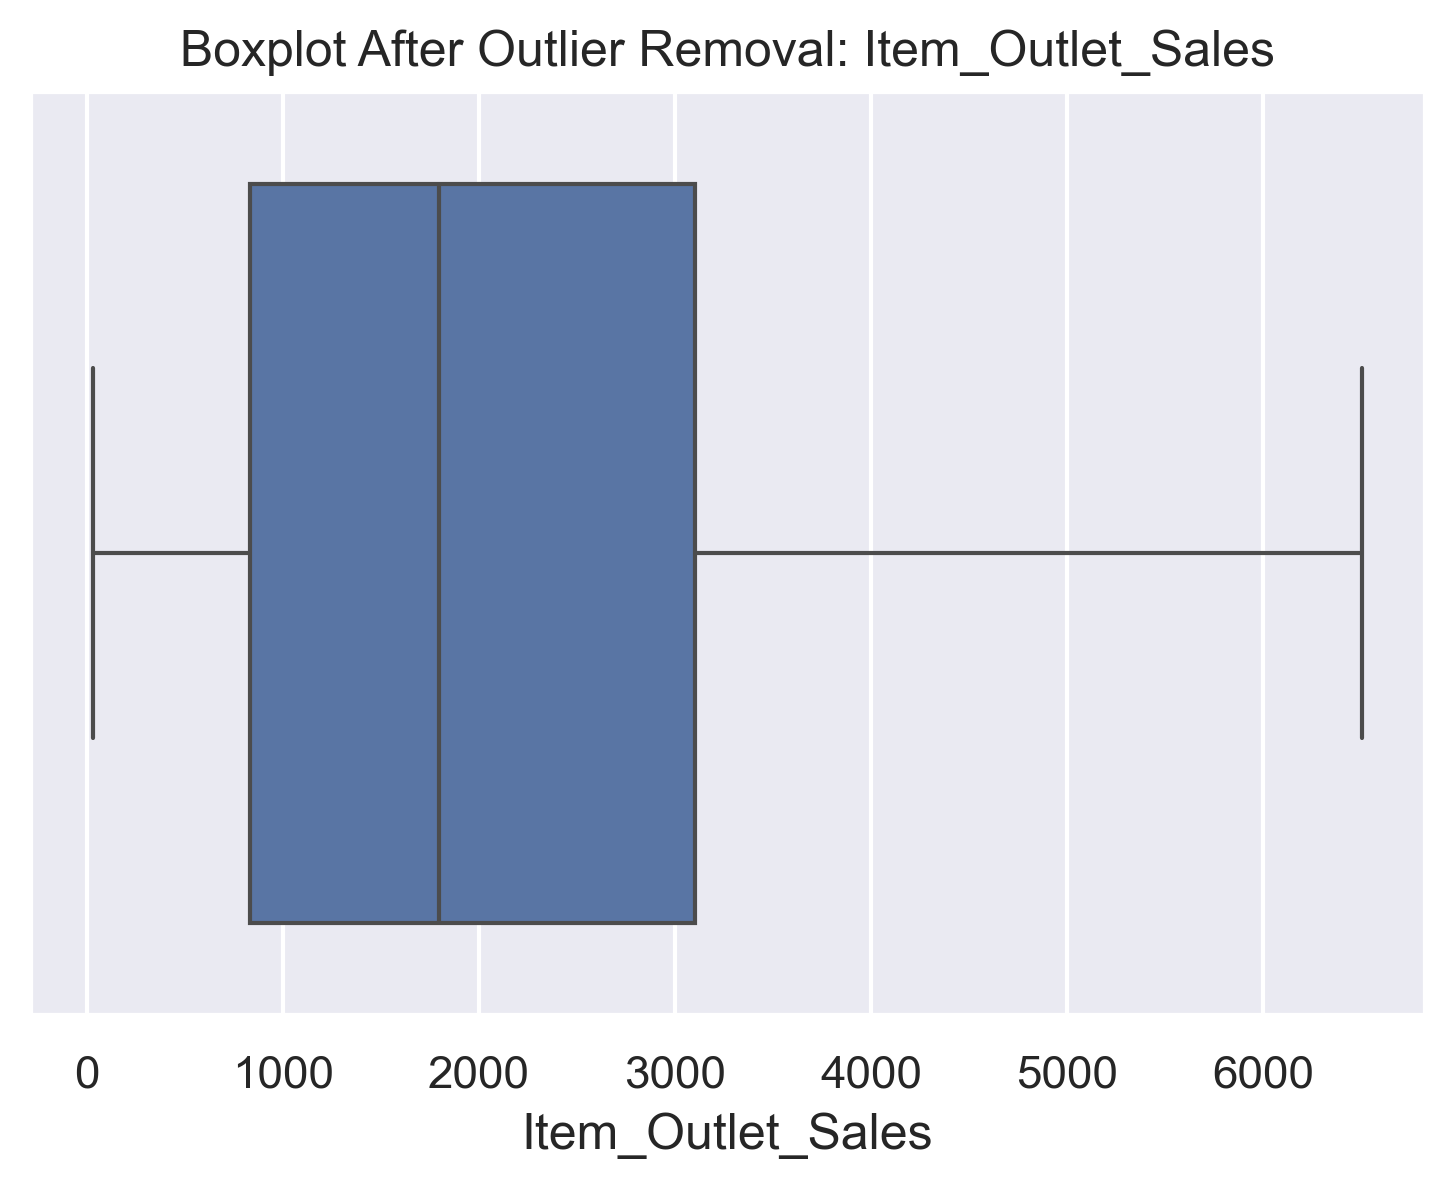

In [369]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot After Outlier Removal: {col}")
    plt.show()

In [370]:
df.drop(['Item_Identifier', 'Outlet_Identifier','Outlet_Establishment_Year','Item_Weight' , 'Outlet_Age'], axis=1, inplace=True)


In [371]:
# scaling
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df[num_cols]=scaler.fit_transform(df[num_cols])
# scaled_data=pd.DataFrame(df[['Income','SpendScore']],columns=['Income','SpendScore'])
df.head()

Item_Fat_Content  Item_Visibility              Item_Type  Item_MRP  \
0          Low Fat        -0.682717                  Dairy  1.163142   
1          Regular        -0.630182            Soft Drinks -1.031872   
2          Low Fat        -0.671127                   Meat -0.015191   
3          Regular         0.012099  Fruits and Vegetables  0.425652   
4          Low Fat        -0.146632              Household -0.970966   

  Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0      Medium               Tier 1  Supermarket Type1           0.856094  
1      Medium               Tier 3  Supermarket Type2          -0.595888  
2      Medium               Tier 1  Supermarket Type1           0.133627  
3       Small               Tier 3      Grocery Store          -0.468429  
4        High               Tier 3  Supermarket Type1          -0.352717

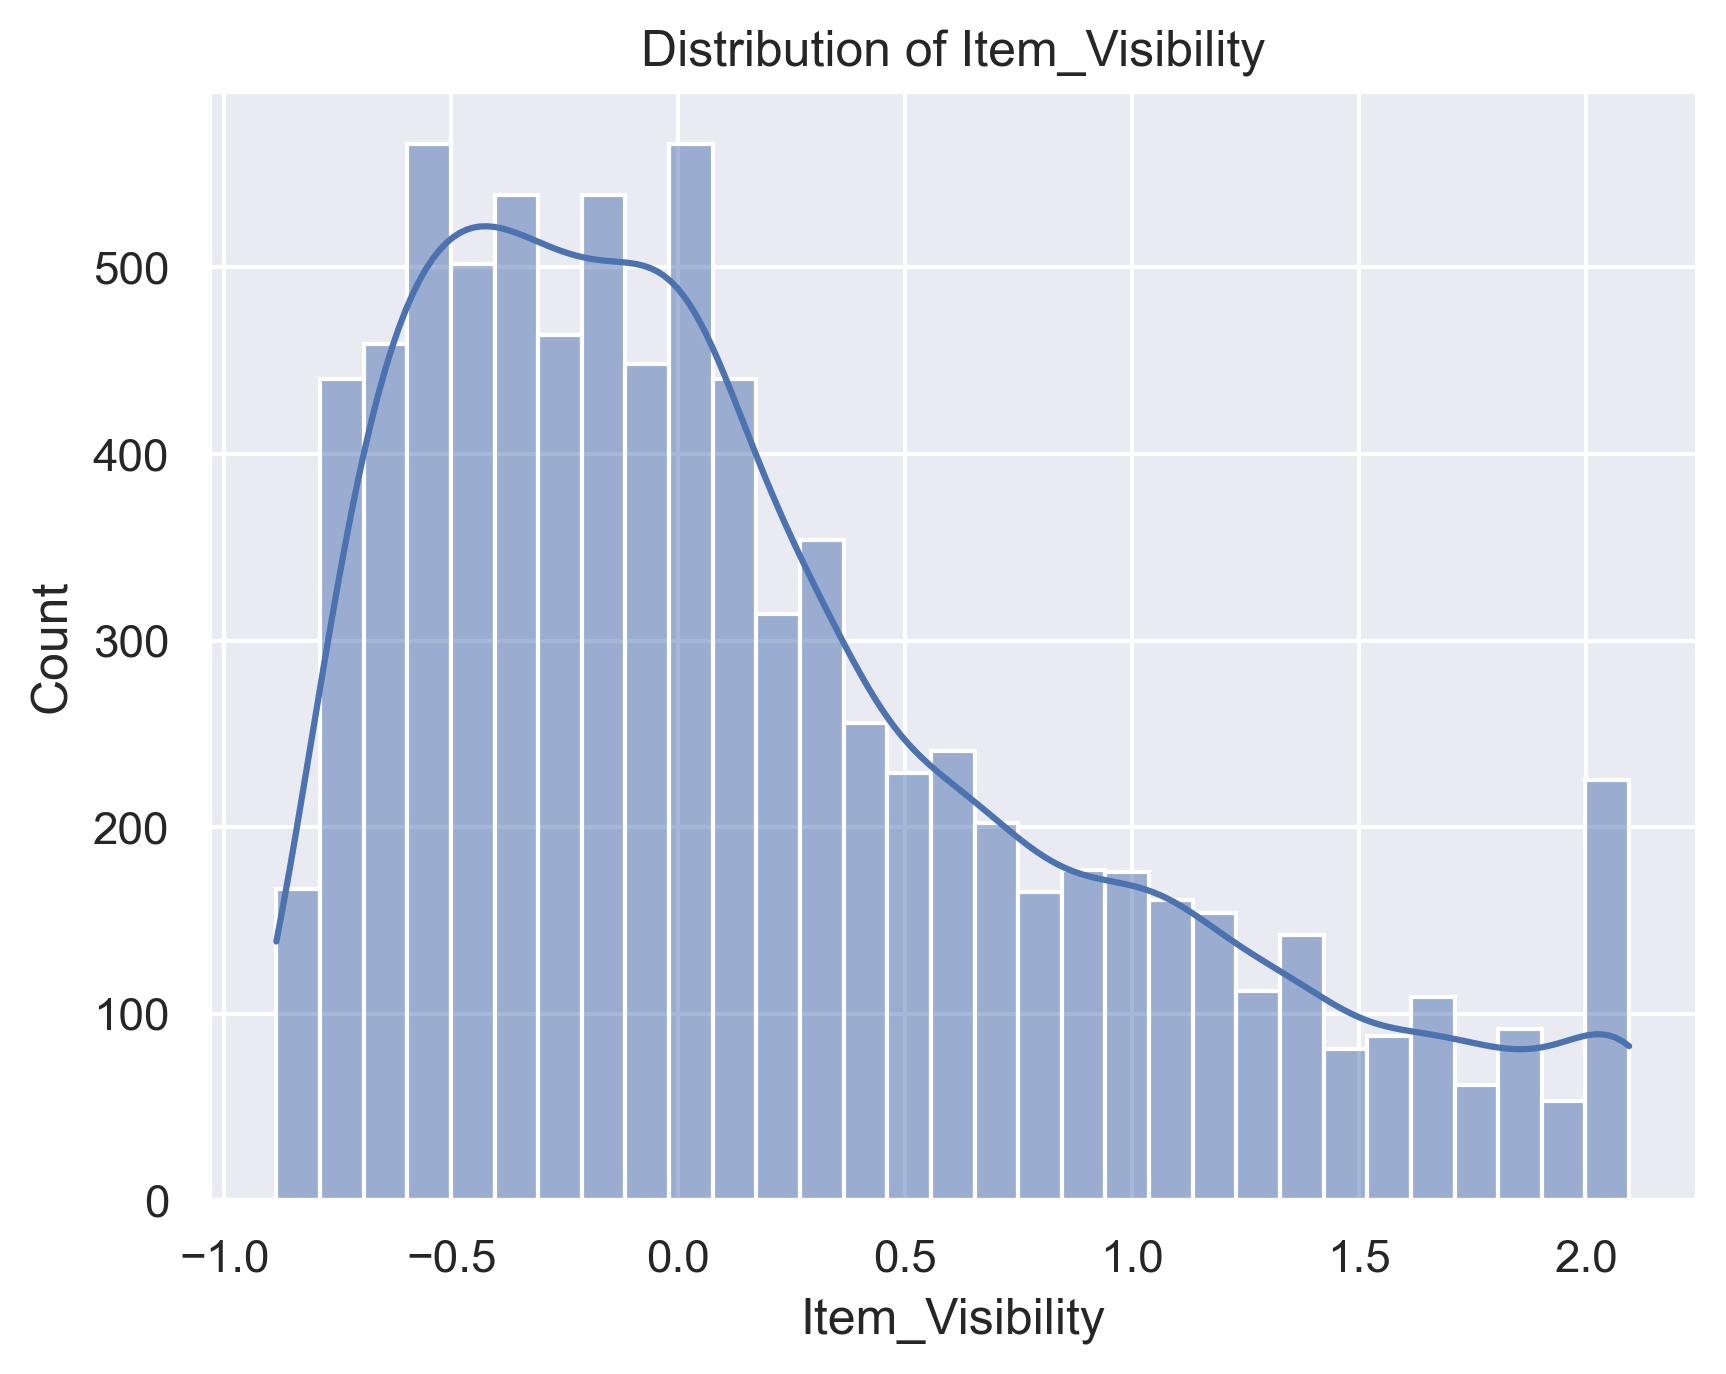

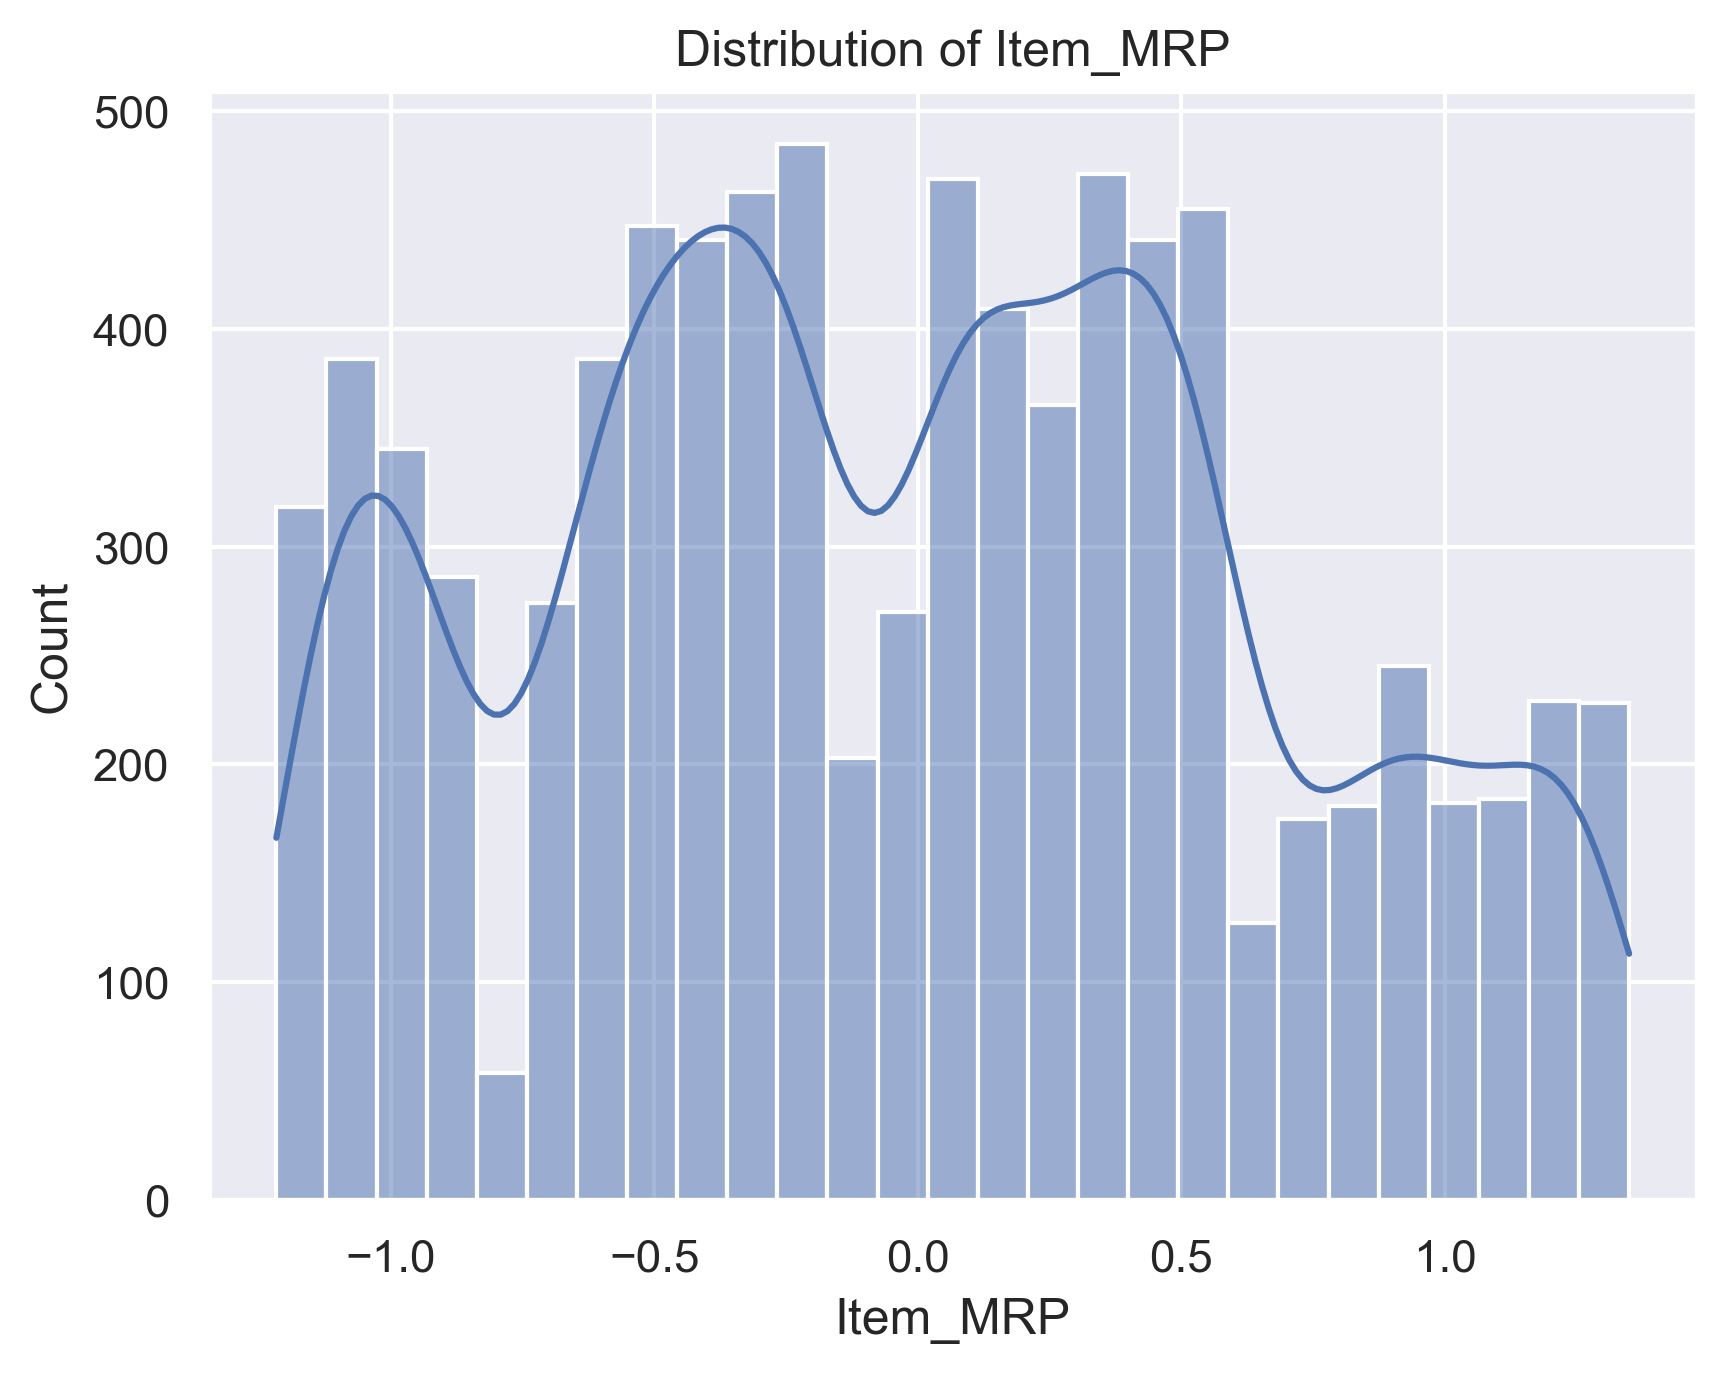

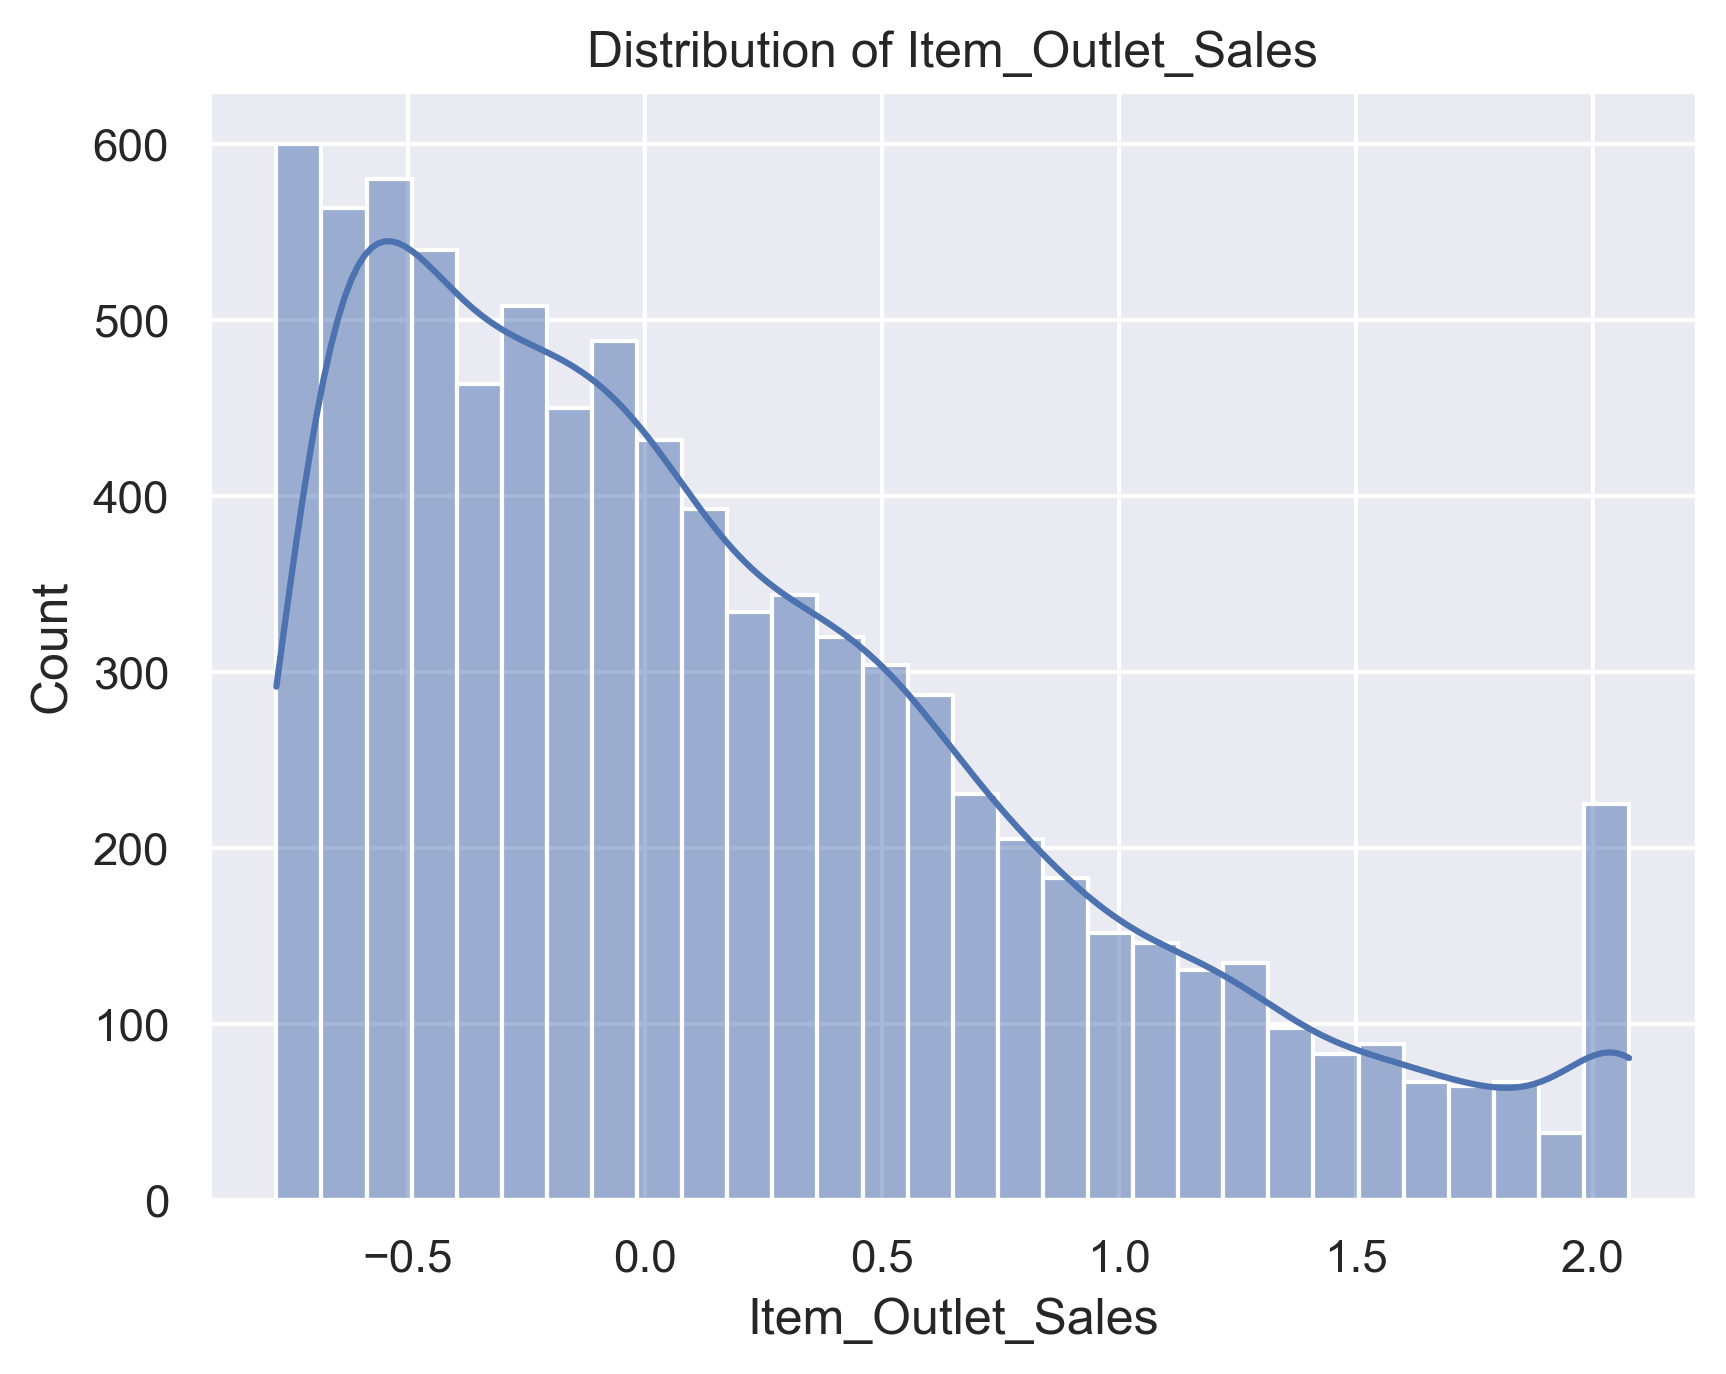

In [372]:
#after scaling
for col in num_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


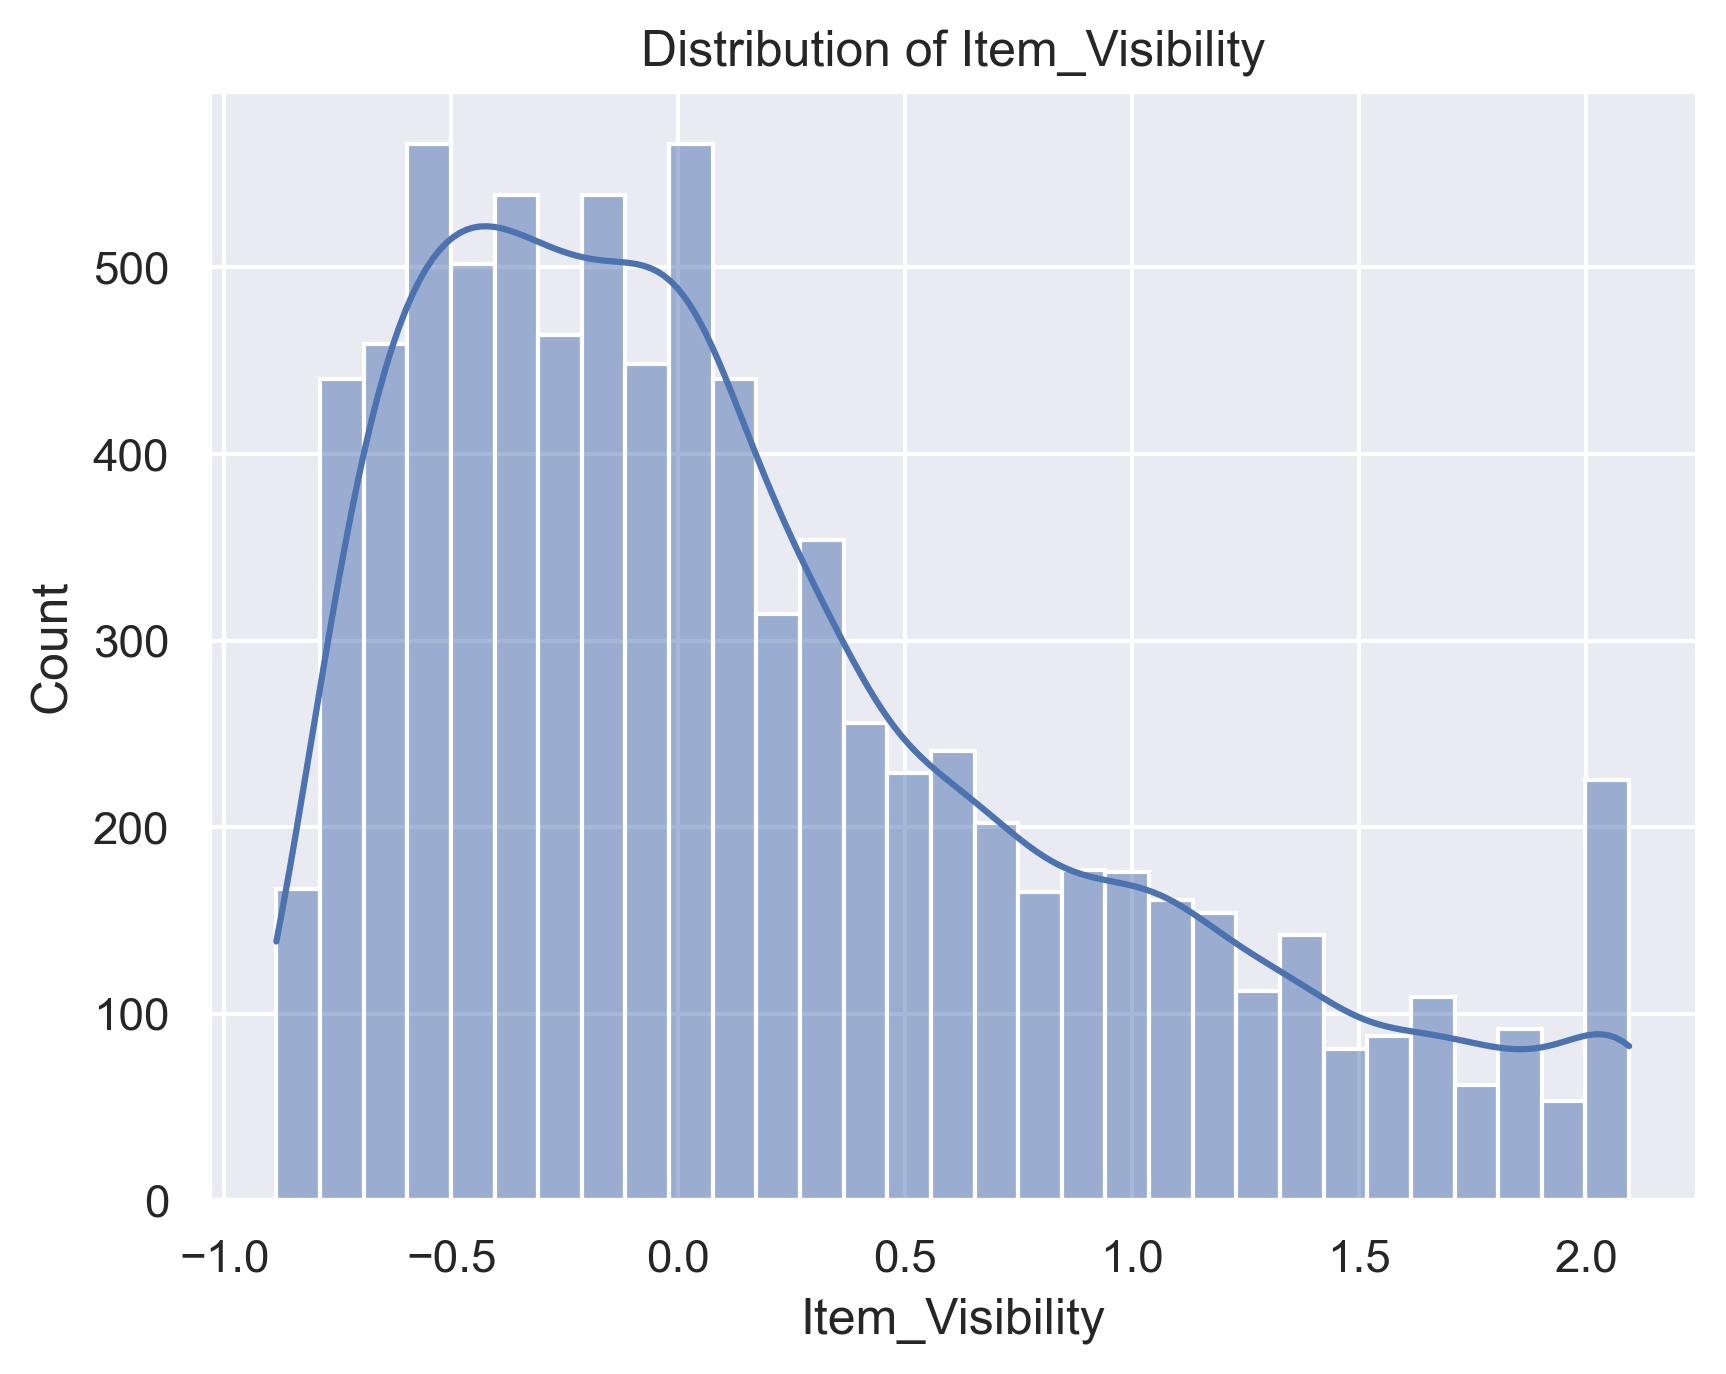

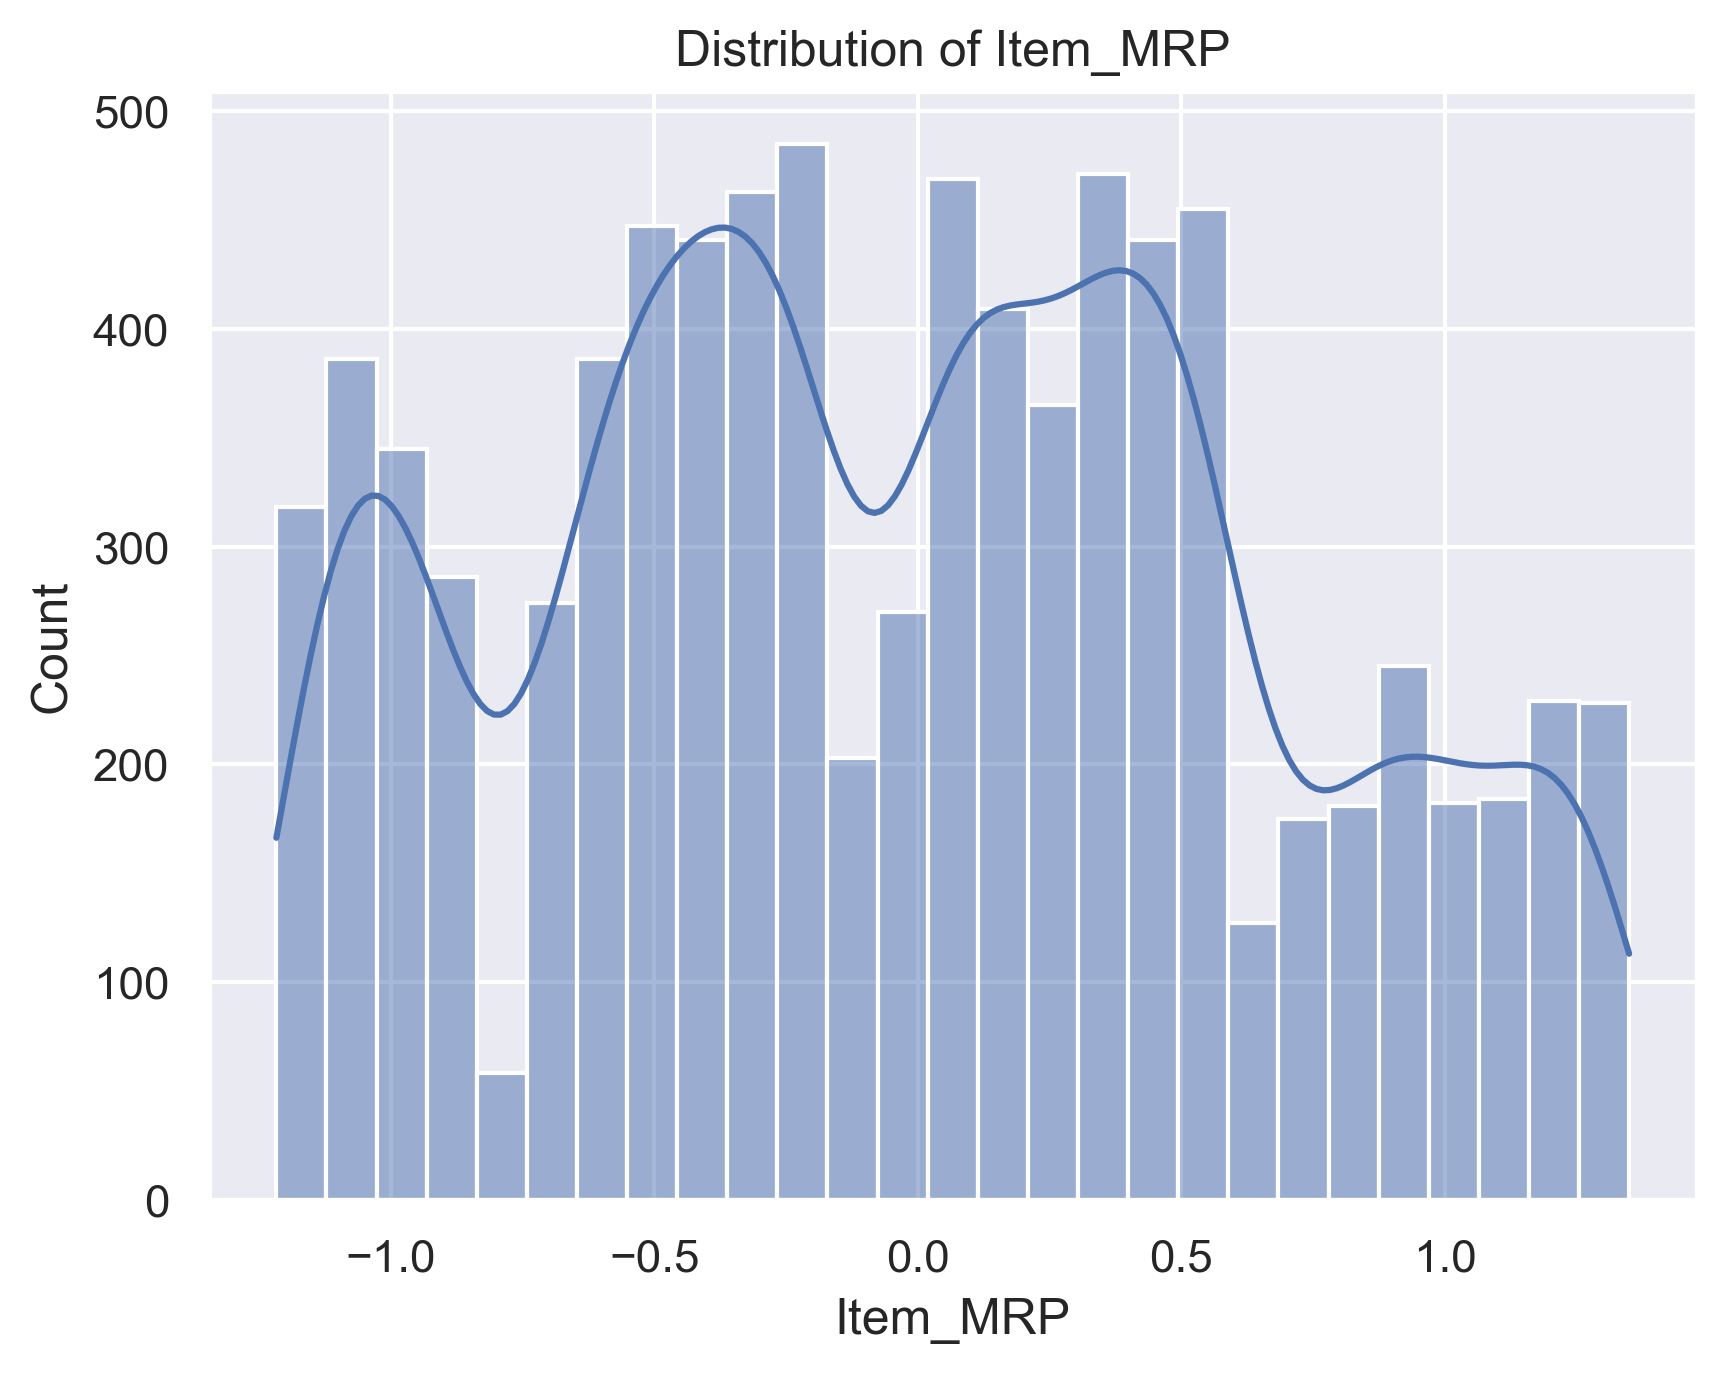

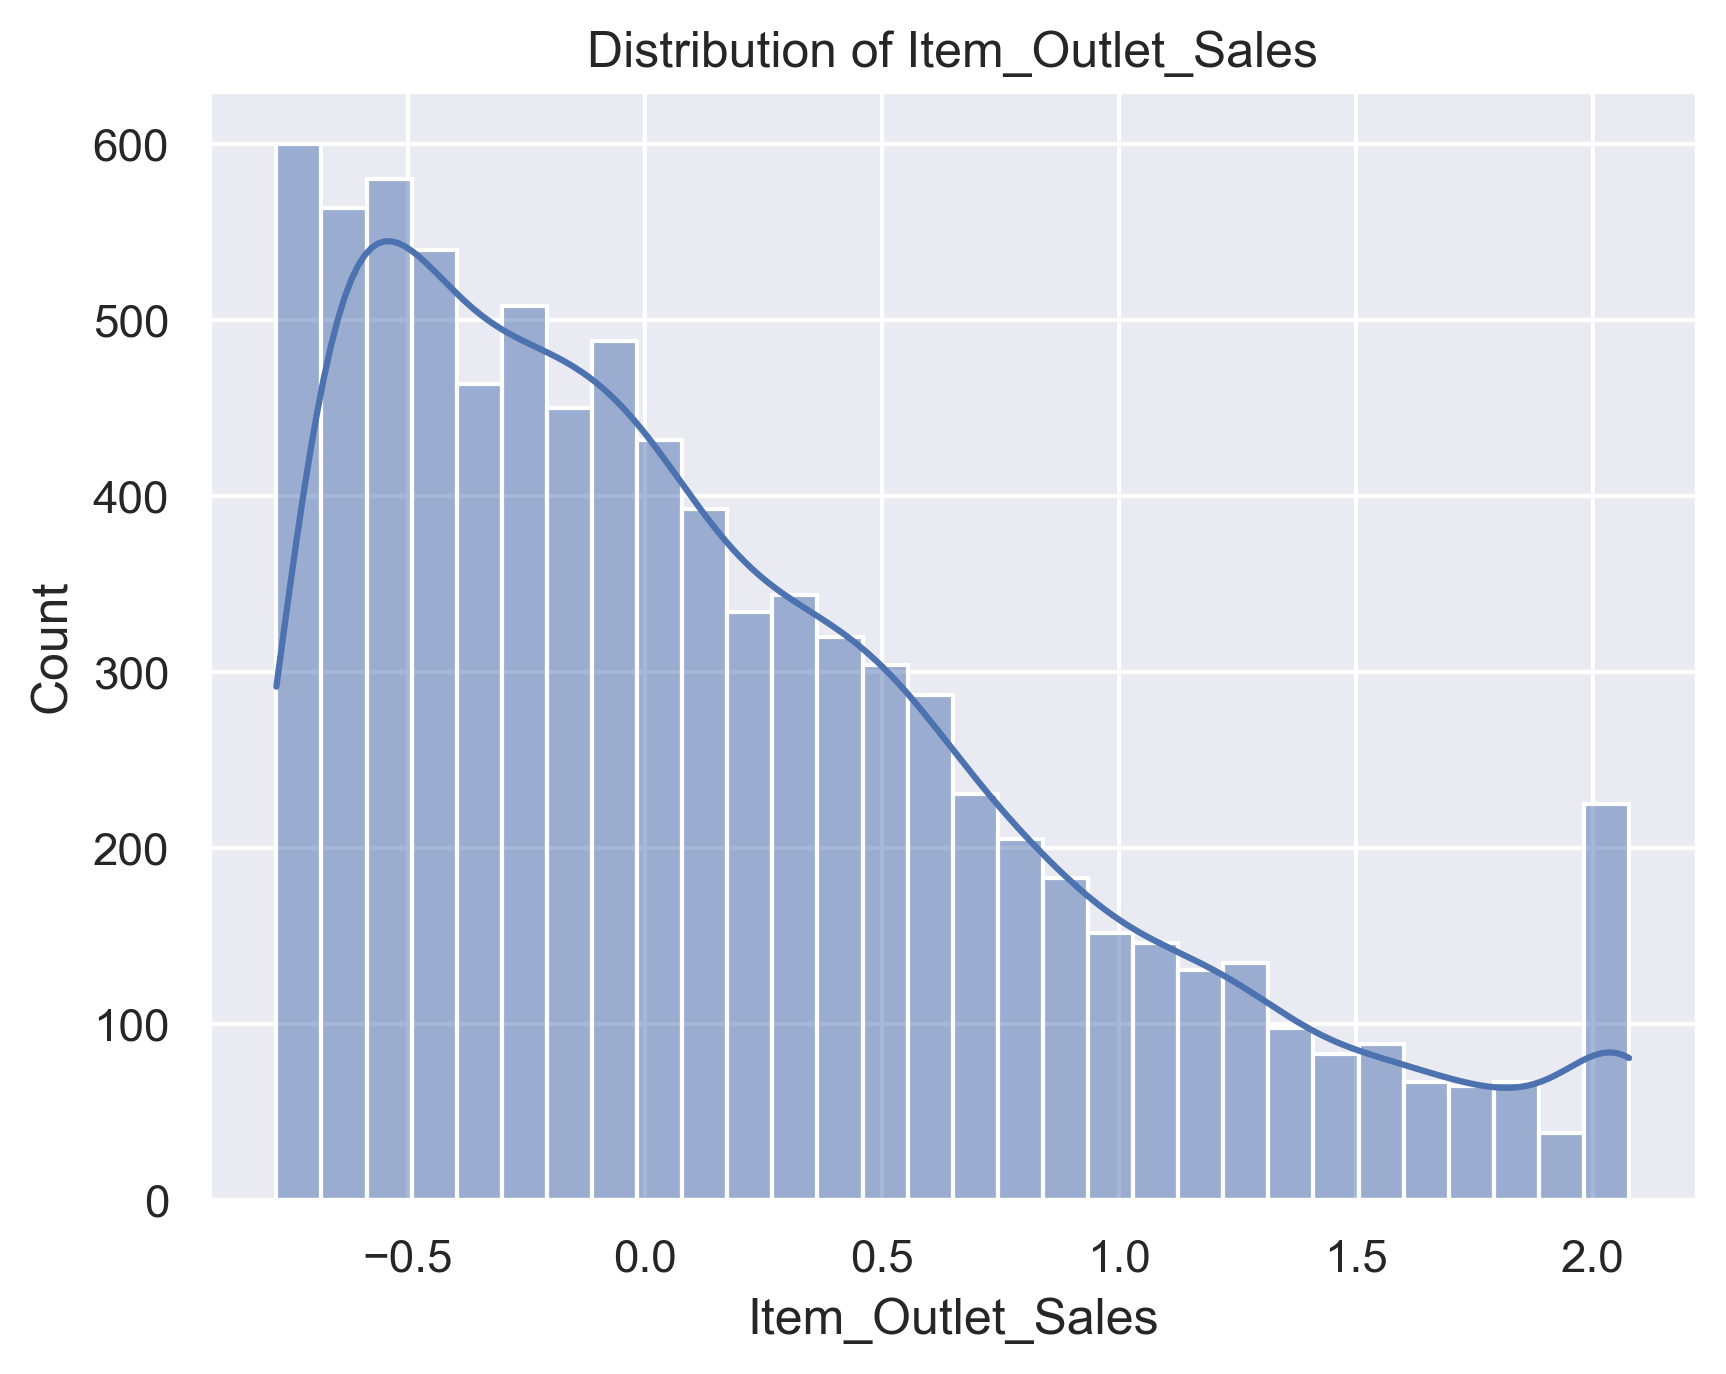

In [373]:
#after scaling
for col in num_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


In [374]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# الأعمدة الكاتيجوري
cat_cols = ['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size','Item_Type']

# OneHot Encoder الجديد
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')


# Fit + Transform
encoded = ohe.fit_transform(df[cat_cols])

# تحويل النتيجة إلى DataFrame
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(cat_cols))

# دمج الأرقام + الـ OHE
df_encoded = pd.concat([df.drop(columns=cat_cols).reset_index(drop=True),
                        encoded_df.reset_index(drop=True)], axis=1)

df_encoded.head()



Item_Visibility  Item_MRP        Outlet_Type  Item_Outlet_Sales  \
0        -0.682717  1.163142  Supermarket Type1           0.856094   
1        -0.630182 -1.031872  Supermarket Type2          -0.595888   
2        -0.671127 -0.015191  Supermarket Type1           0.133627   
3         0.012099  0.425652      Grocery Store          -0.468429   
4        -0.146632 -0.970966  Supermarket Type1          -0.352717   

   Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
0                       1.0                       0.0   
1                       0.0                       1.0   
2                       1.0                       0.0   
3                       0.0                       1.0   
4                       1.0                       0.0   

   Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
0                          1.0                          0.0   
1                          0.0                          0.0   
2                          1.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   Outlet_Location_Type_Tier 3  Outlet_Size_High  ...  \
0                          0.0               0.0  ...   
1                          1.0               0.0  ...   
2                          0.0               0.0  ...   
3                          1.0               0.0  ...   
4                          1.0               1.0  ...   

   Item_Type_Fruits and Vegetables  Item_Type_Hard Drinks  \
0                              0.0                    0.0   
1                              0.0                    0.0   
2                              0.0                    0.0   
3                              1.0                    0.0   
4                              0.0                    0.0   

   Item_Type_Health and Hygiene  Item_Type_Household  Item_Type_Meat  \
0                           0.0                  0.0             0.0   
1                           0.0                  0.0             0.0   
2                           0.0                  0.0             1.0   
3                           0.0                  0.0             0.0   
4                           0.0                  1.0             0.0   

   Item_Type_Others  Item_Type_Seafood  Item_Type_Snack Foods  \
0               0.0                0.0                    0.0   
1               0.0                0.0                    0.0   
2               0.0                0.0                    0.0   
3               0.0                0.0                    0.0   
4               0.0                0.0                    0.0   

   Item_Type_Soft Drinks  Item_Type_Starchy Foods  
0                    0.0                      0.0  
1                    1.0                      0.0  
2                    0.0                      0.0  
3                    0.0                      0.0  
4                    0.0                      0.0  

[5 rows x 28 columns]

In [375]:
pca_2d = PCA(n_components=2, random_state=42)
X_2d = pca_2d.fit_transform(df[num_cols])  

# تحويل النتيجة DataFrame للرسم بسهولة
df_pca_2d = pd.DataFrame(X_2d, columns=['PC1', 'PC2'])
print( df_pca_2d.shape)


(8523, 2)


In [376]:
# 2) PCA 95% Variance (Clustering / Analysis)
# ------------------------------
pca_95 = PCA(n_components=0.95, random_state=42)
X_pca_95 = pca_95.fit_transform(df[num_cols]) 


In [377]:
# no changing in reduce vumber of features 
print(f"Original number of features: {df[num_cols].shape[1]}")
print(f"Reduced number of features (retaining 95% variance): {X_pca_95.shape[1]}")
print(f"Information retained: {np.sum(pca_95.explained_variance_ratio_) * 100:.2f}%")


Original number of features: 3
Reduced number of features (retaining 95% variance): 3
Information retained: 100.00%


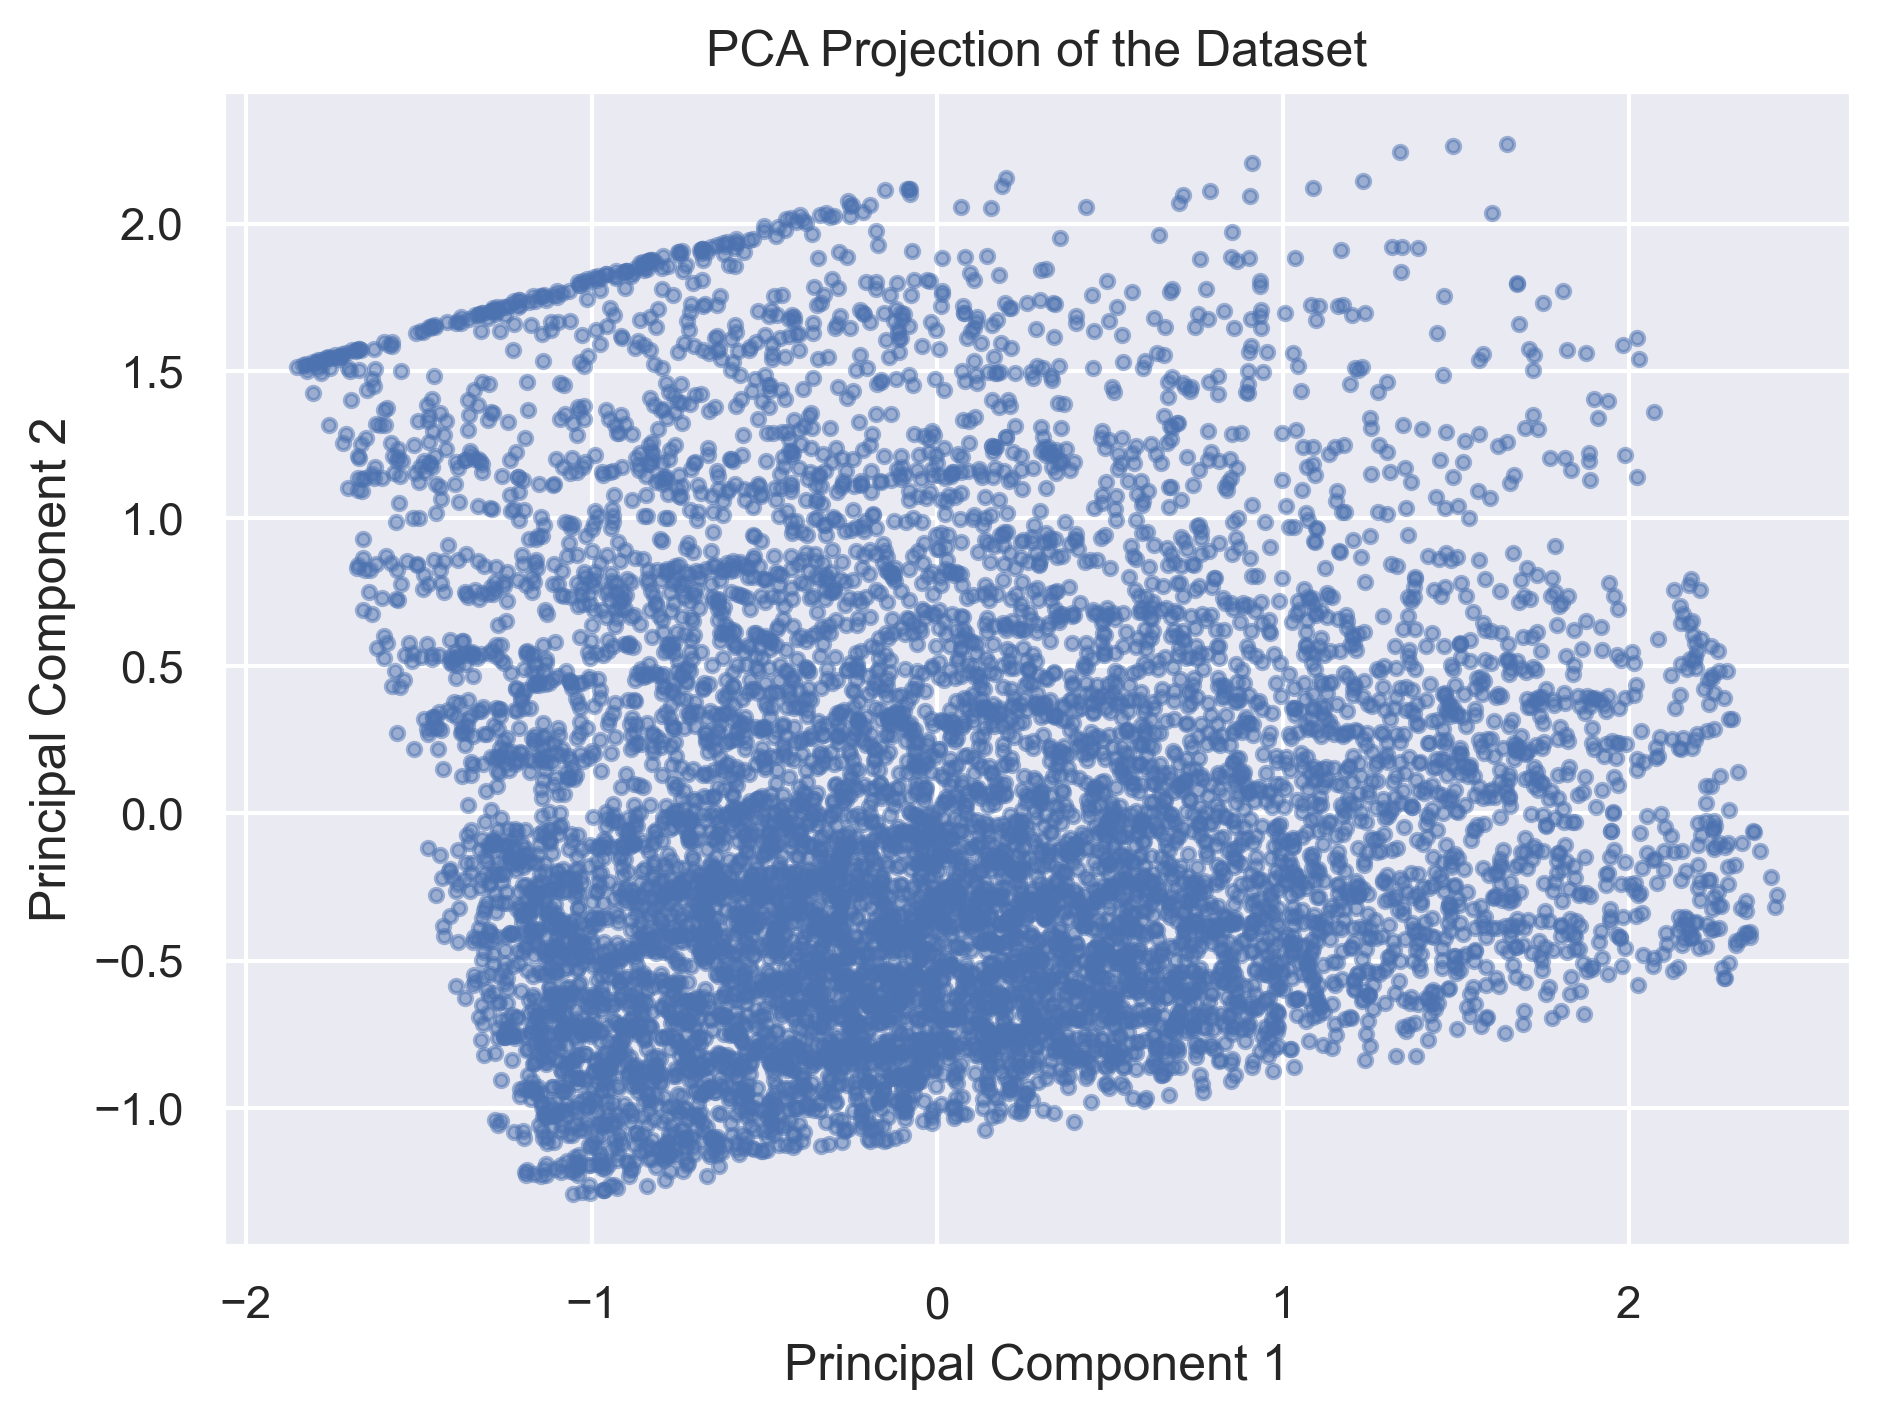

In [378]:
plt.figure(figsize=(7, 5))
plt.scatter(X_pca_95[:, 0], X_pca_95[:, 1], s=10, alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of the Dataset")
plt.grid(True)
plt.show()


In [379]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=20)
y_pred = kmeans.fit_predict(X_pca_95)



In [380]:
# for later comparison bet dbscan
try:
    kmeans_labels
except NameError:
    try:
        kmeans_labels = y_pred  # from the original K-Means cell
    except NameError:
        pass


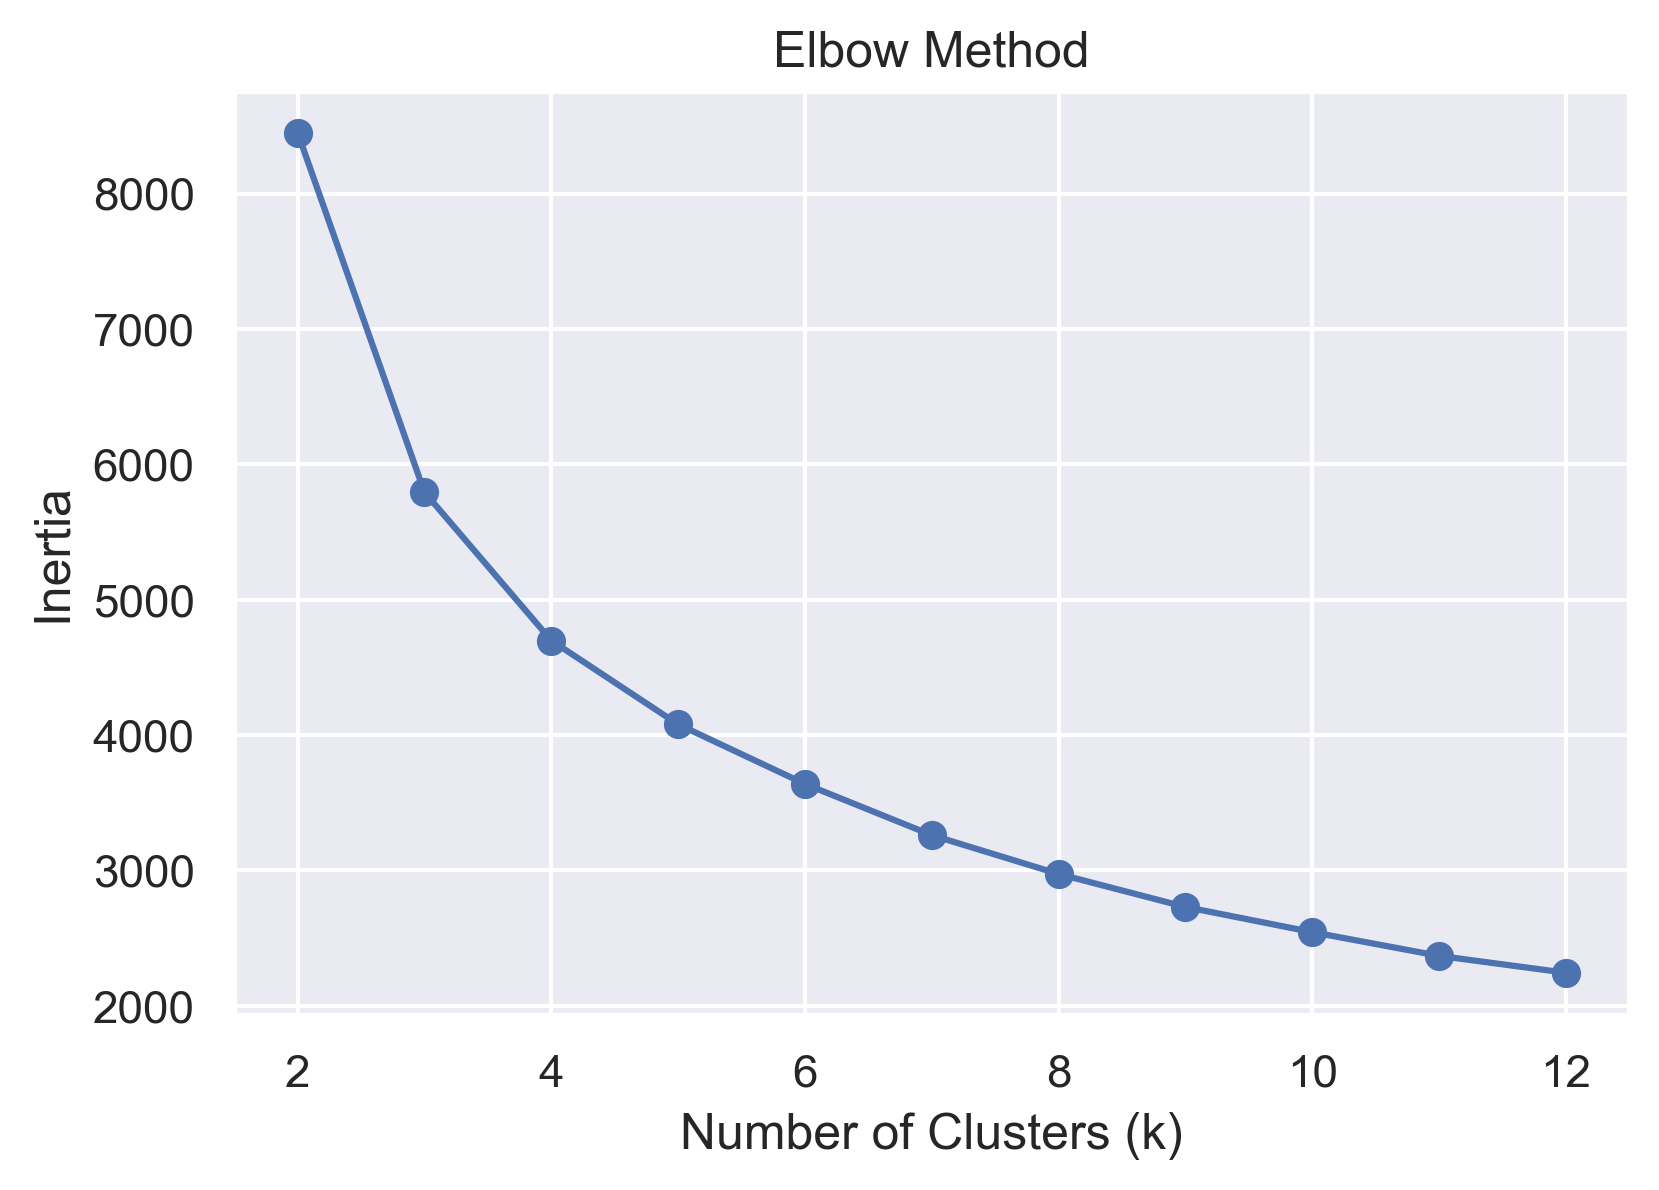

In [381]:
inertia = []
K_range = range(2, 13)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(df[num_cols])
    inertia.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(list(K_range), inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()




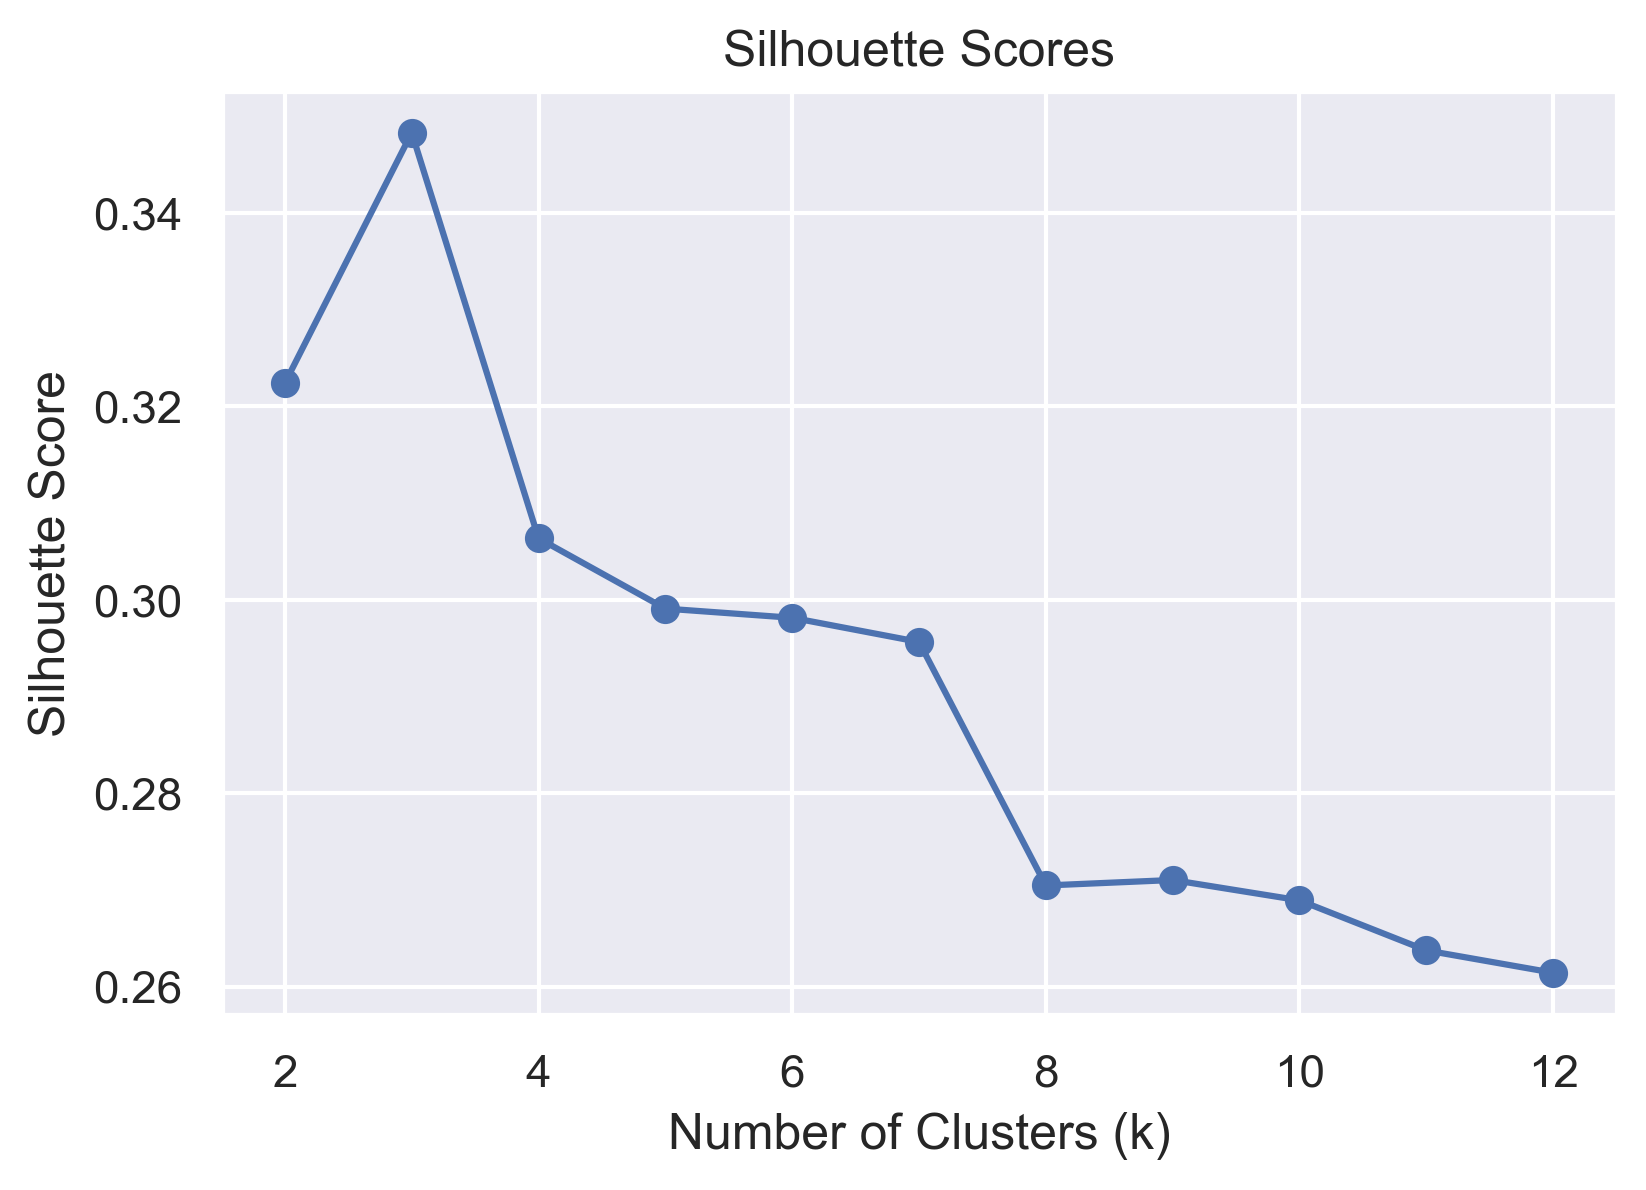

Best K = 3


In [382]:
sil_scores = []

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(df[num_cols])
    sil_scores.append(silhouette_score(df[num_cols], labels))

plt.figure(figsize=(6,4))
plt.plot(list(K_range), sil_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores")
plt.show()

# Best k
best_k = list(K_range)[sil_scores.index(max(sil_scores))]
print("Best K =", best_k)


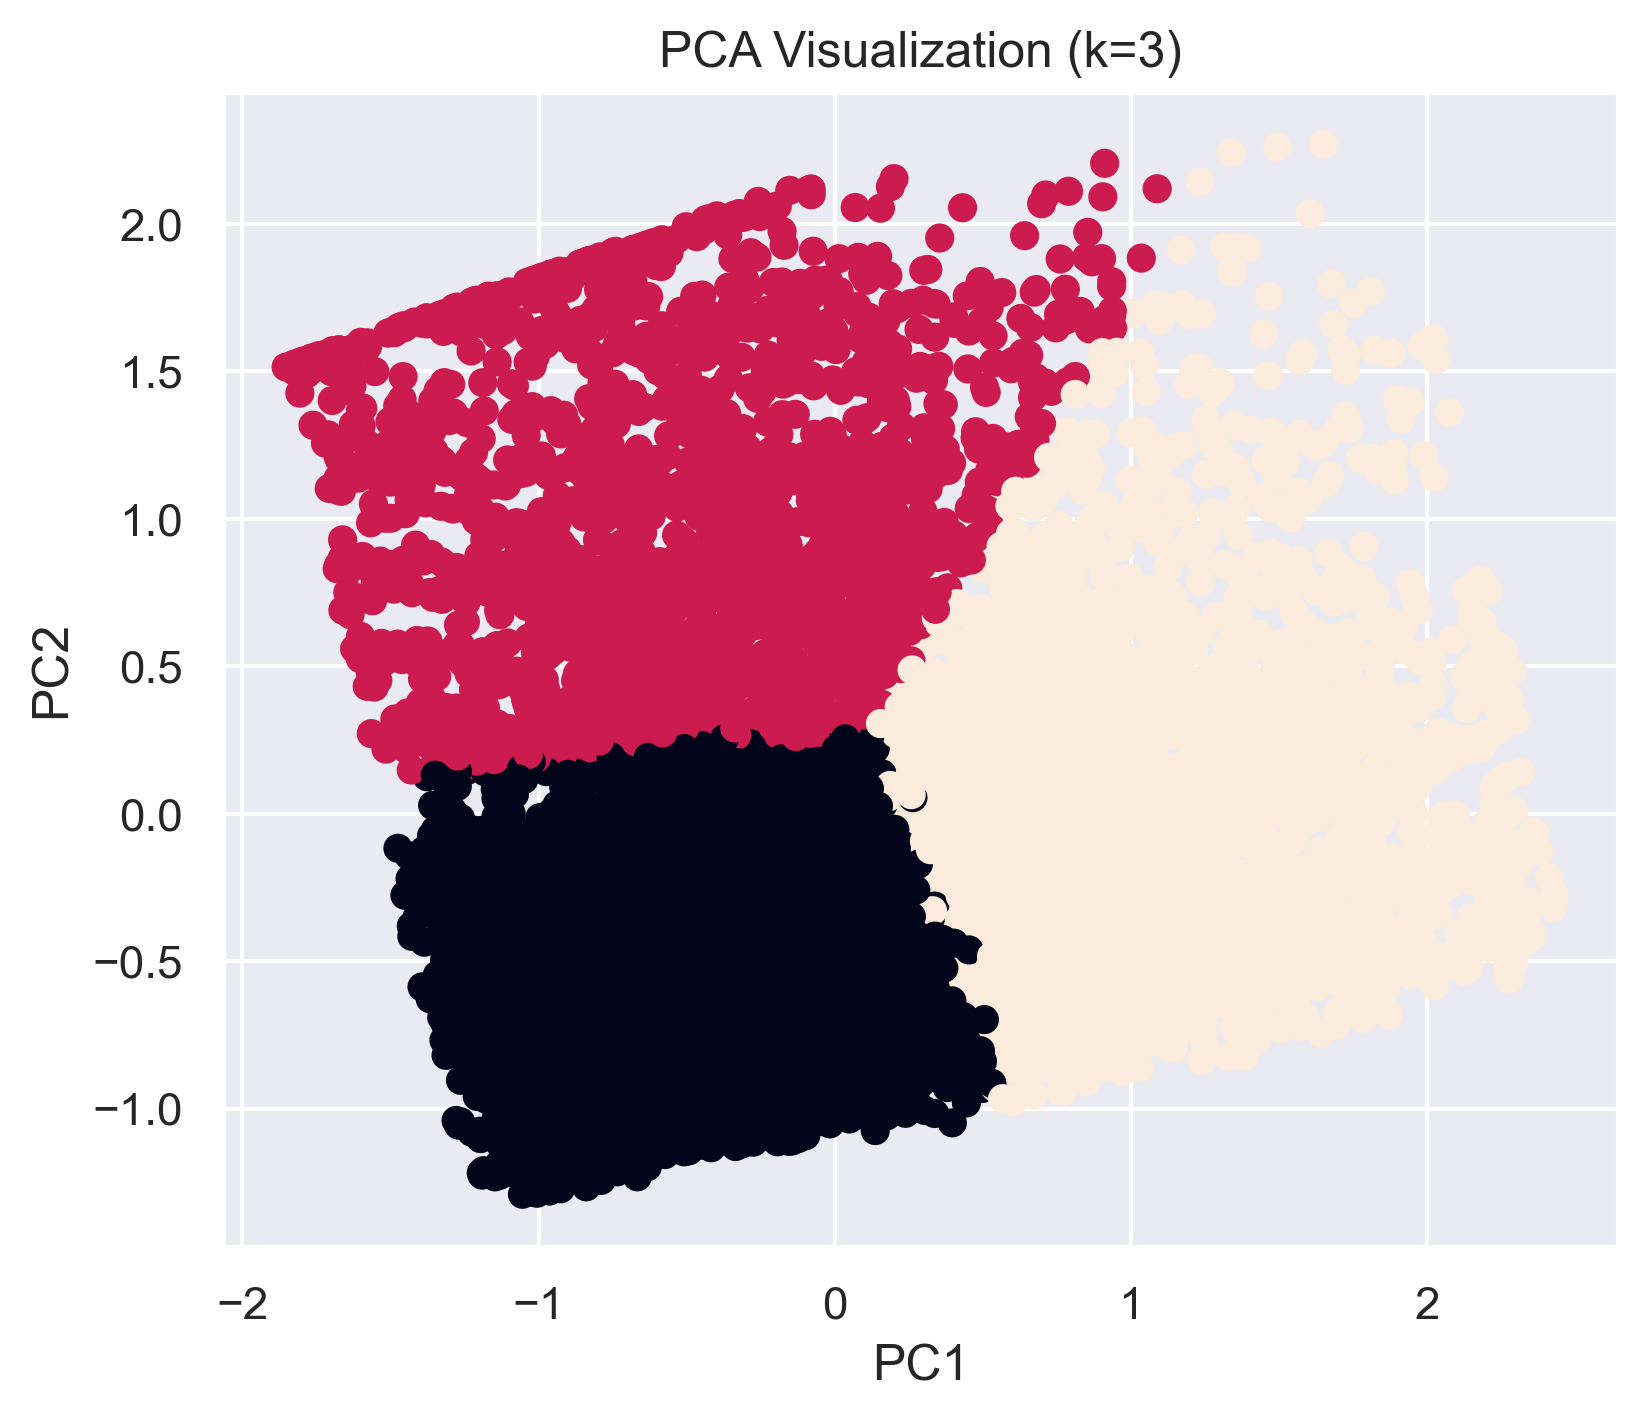

In [383]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_viz = pca.fit_transform(df[num_cols])

km_best = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels_best = km_best.fit_predict(df[num_cols])

plt.figure(figsize=(6,5))
plt.scatter(X_pca_viz[:,0], X_pca_viz[:,1], c=labels_best)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"PCA Visualization (k={best_k})")
plt.show()


In [484]:
# =========================
# KMeans TEST (Pseudo Accuracy + ARI)
# =========================

import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import adjusted_rand_score, accuracy_score
from scipy.stats import mode

# ---------
# 1) تجهيز X (بعد Encoding + Scaling)
# ---------
# نستخدم كل الأعمدة ما عدا Outlet_Type لأنه Ground Truth
X = df_encoded.drop(columns=['Outlet_Type']).values

# ---------
# 2) Pseudo Ground Truth
# ---------
le = LabelEncoder()
y_true = le.fit_transform(df['Outlet_Type'])

print("Ground truth classes:", np.unique(y_true))

# ---------
# 3) KMeans Prediction
# ---------
kmeans = KMeans(
    n_clusters=len(np.unique(y_true)),
    random_state=42,
    n_init=10
)

y_pred = kmeans.fit_predict(X)

# ---------
# 5) Accuracy with Label Mapping (wine-style)
# ---------
def get_accuracy(y_true, y_pred):
    labels = np.unique(y_pred)
    mapped = np.zeros_like(y_pred)

    for l in labels:
        mask = (y_pred == l)
        true_label = mode(y_true[mask], keepdims=True)[0][0]
        mapped[mask] = true_label

    return accuracy_score(y_true, mapped)

acc = get_accuracy(y_true, y_pred)
print(f"Pseudo Accuracy: {acc*100:.2f}%")


Ground truth classes: [0 1 2 3]
Pseudo Accuracy: 65.43%


In [385]:
df[num_cols].describe().loc[['mean','std']]


Item_Visibility  Item_MRP  Item_Outlet_Sales
mean         0.173111 -0.022000           0.159671
std          0.740648  0.678251           0.716730

## Part B — DBSCAN Notebook
---

# Machine Learning Course Project — Clustering Notebook
## DBSCAN Clustering with PCA (Unsupervised Learning)

This notebook presents an **unsupervised learning** project using clustering techniques on a real-world dataset.

### Project Goal
The main objective is to **discover natural groups (clusters)** within the dataset using **DBSCAN** and visualize the clustering structure using **PCA**.

### Why Clustering?
Unlike classification or regression, clustering does **not require a target label**.  
Instead, the algorithm groups similar data points together based on patterns in the features.

### Dataset Requirements (As per course guidelines)
This project uses a dataset that:
- Contains **3000+ records**
- Is **not cleaned** and may contain data issues such as:
  - Missing values
  - Duplicate rows
  - Outliers / noise
  - Categorical features that require encoding
  - Numerical features that require scaling

### Models & Evaluation
We will apply and evaluate clustering using:
- **DBSCAN (Density-Based Clustering)**
- Dimensionality reduction using **PCA** for visualization

To measure clustering quality (since accuracy is not applicable in clustering), we will use:
- **Silhouette Score** (higher is better)
- **Davies–Bouldin Index** (lower is better)


In [388]:
# High-quality plot rendering for Colab / Jupyter
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['lines.linewidth'] = 2.5
sns.set_style("whitegrid")


In [389]:
# Section 5.1: PCA Transformation
# ================================

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(df[num_cols])

print("PCA transformed shape:", X_pca.shape)


PCA transformed shape: (8523, 2)


In [390]:
from sklearn.neighbors import NearestNeighbors

# Section 6.1: K-Distance Graph


k = 5  # typically min_samples
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_pca)

distances, indices = neighbors_fit.kneighbors(X_pca)

# Sort distances to the k-th nearest neighbor
k_distances = np.sort(distances[:, k-1])


In [391]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import DBSCAN
import numpy as np

eps_values = [0.2, 0.3, 0.35, 0.4, 0.45]
min_samples = 5

print("DBSCAN eps evaluation:\n")

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(X_pca)

    # ignore noise
    mask = labels != -1
    unique_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    if unique_clusters <= 1:
        print(f"eps={eps} -> Only one cluster detected")
        continue

    sil = silhouette_score(X_pca[mask], labels[mask])
    dbi = davies_bouldin_score(X_pca[mask], labels[mask])

    print(f"eps={eps} -> Silhouette={sil:.3f}, DBI={dbi:.3f}")


DBSCAN eps evaluation:

eps=0.2 -> Only one cluster detected
eps=0.3 -> Only one cluster detected
eps=0.35 -> Only one cluster detected
eps=0.4 -> Only one cluster detected
eps=0.45 -> Only one cluster detected


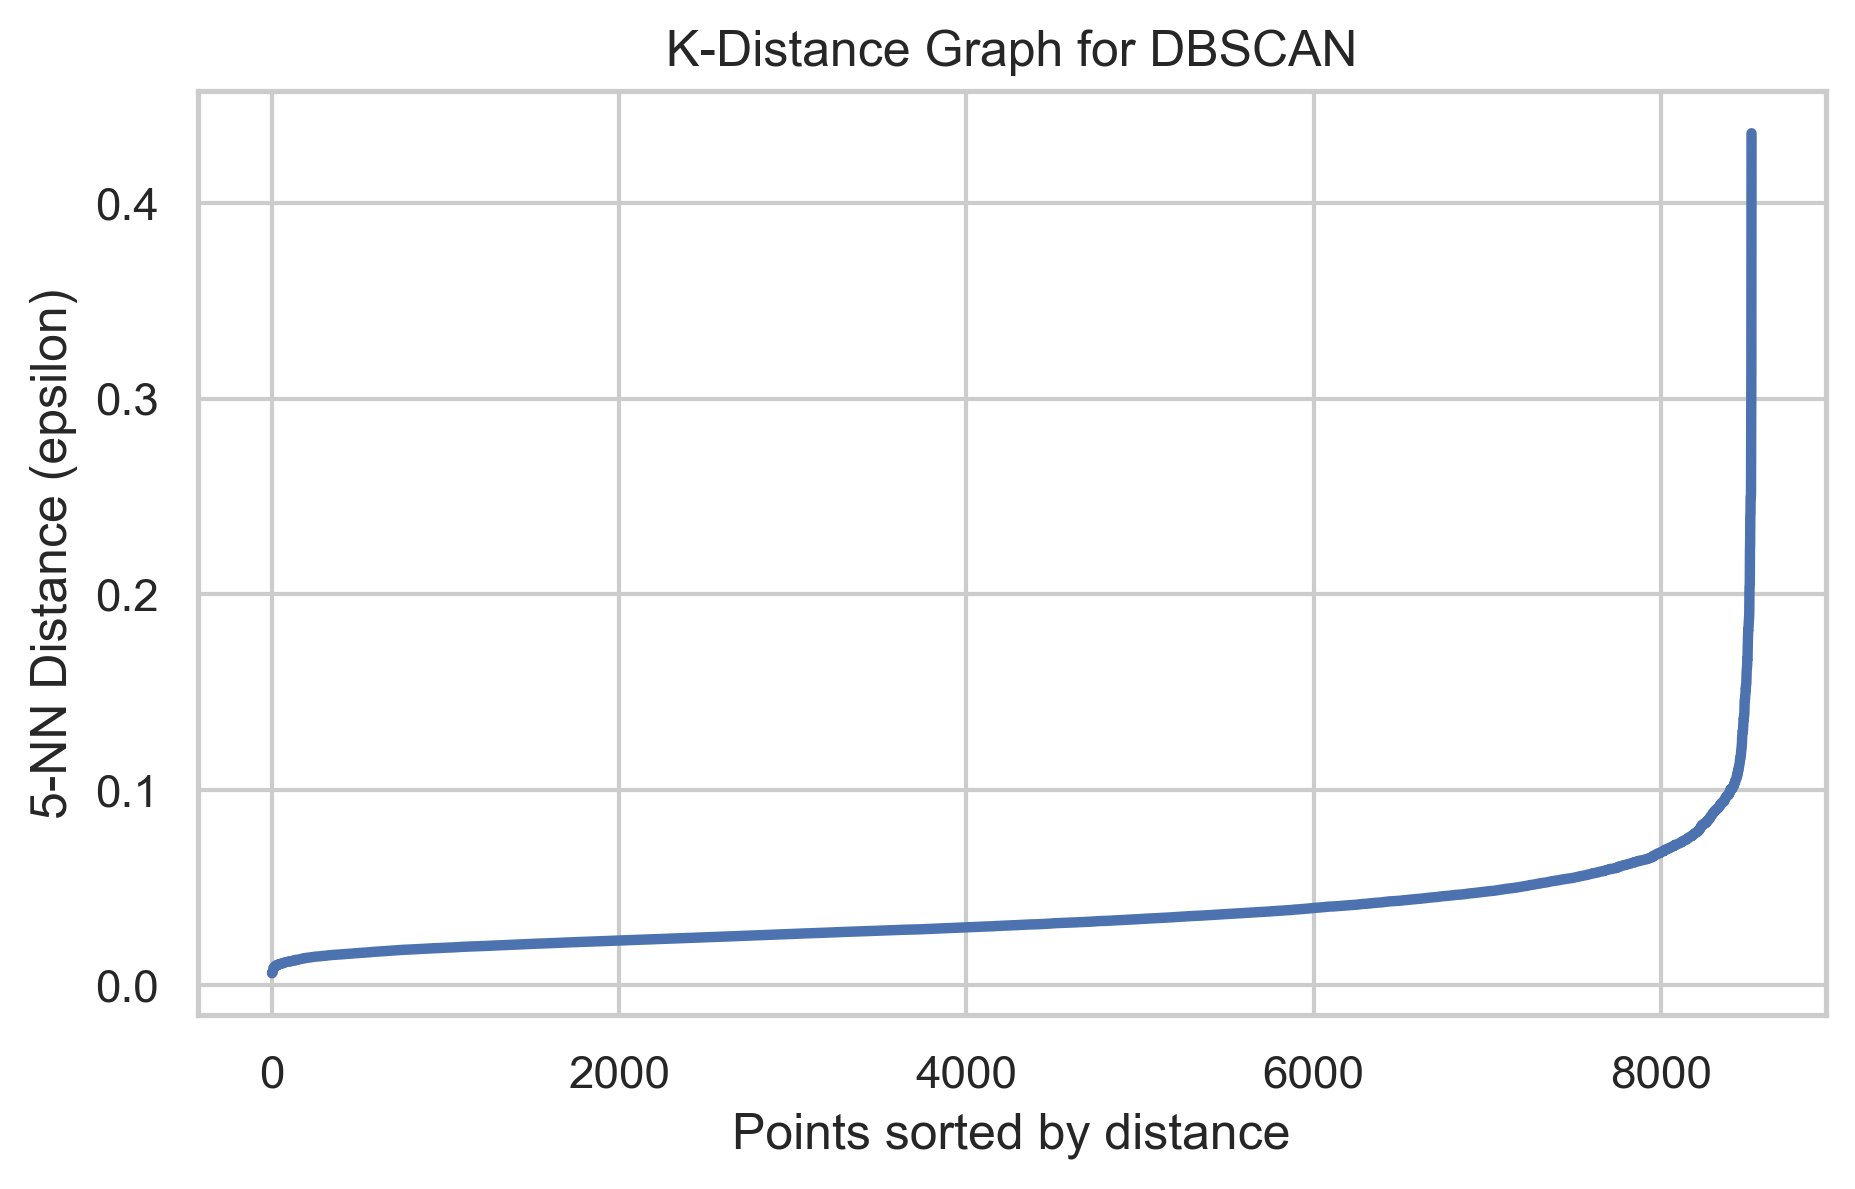

In [478]:
# ================================
# Section 6.2: K-Distance Plot
# ================================

plt.figure(figsize=(7, 4))
plt.plot(k_distances)
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{k}-NN Distance (epsilon)")
plt.title("K-Distance Graph for DBSCAN")
plt.grid(True)
plt.show()


In [393]:
# ================================
# Section 7.1: Apply DBSCAN
# ================================

dbscan = DBSCAN(
    eps=0.1,
    # adjust based on K-distance graph
    min_samples=8
)

dbscan_labels = dbscan.fit_predict(X_pca)

print("Unique cluster labels:", np.unique(dbscan_labels))


Unique cluster labels: [-1  0  1]


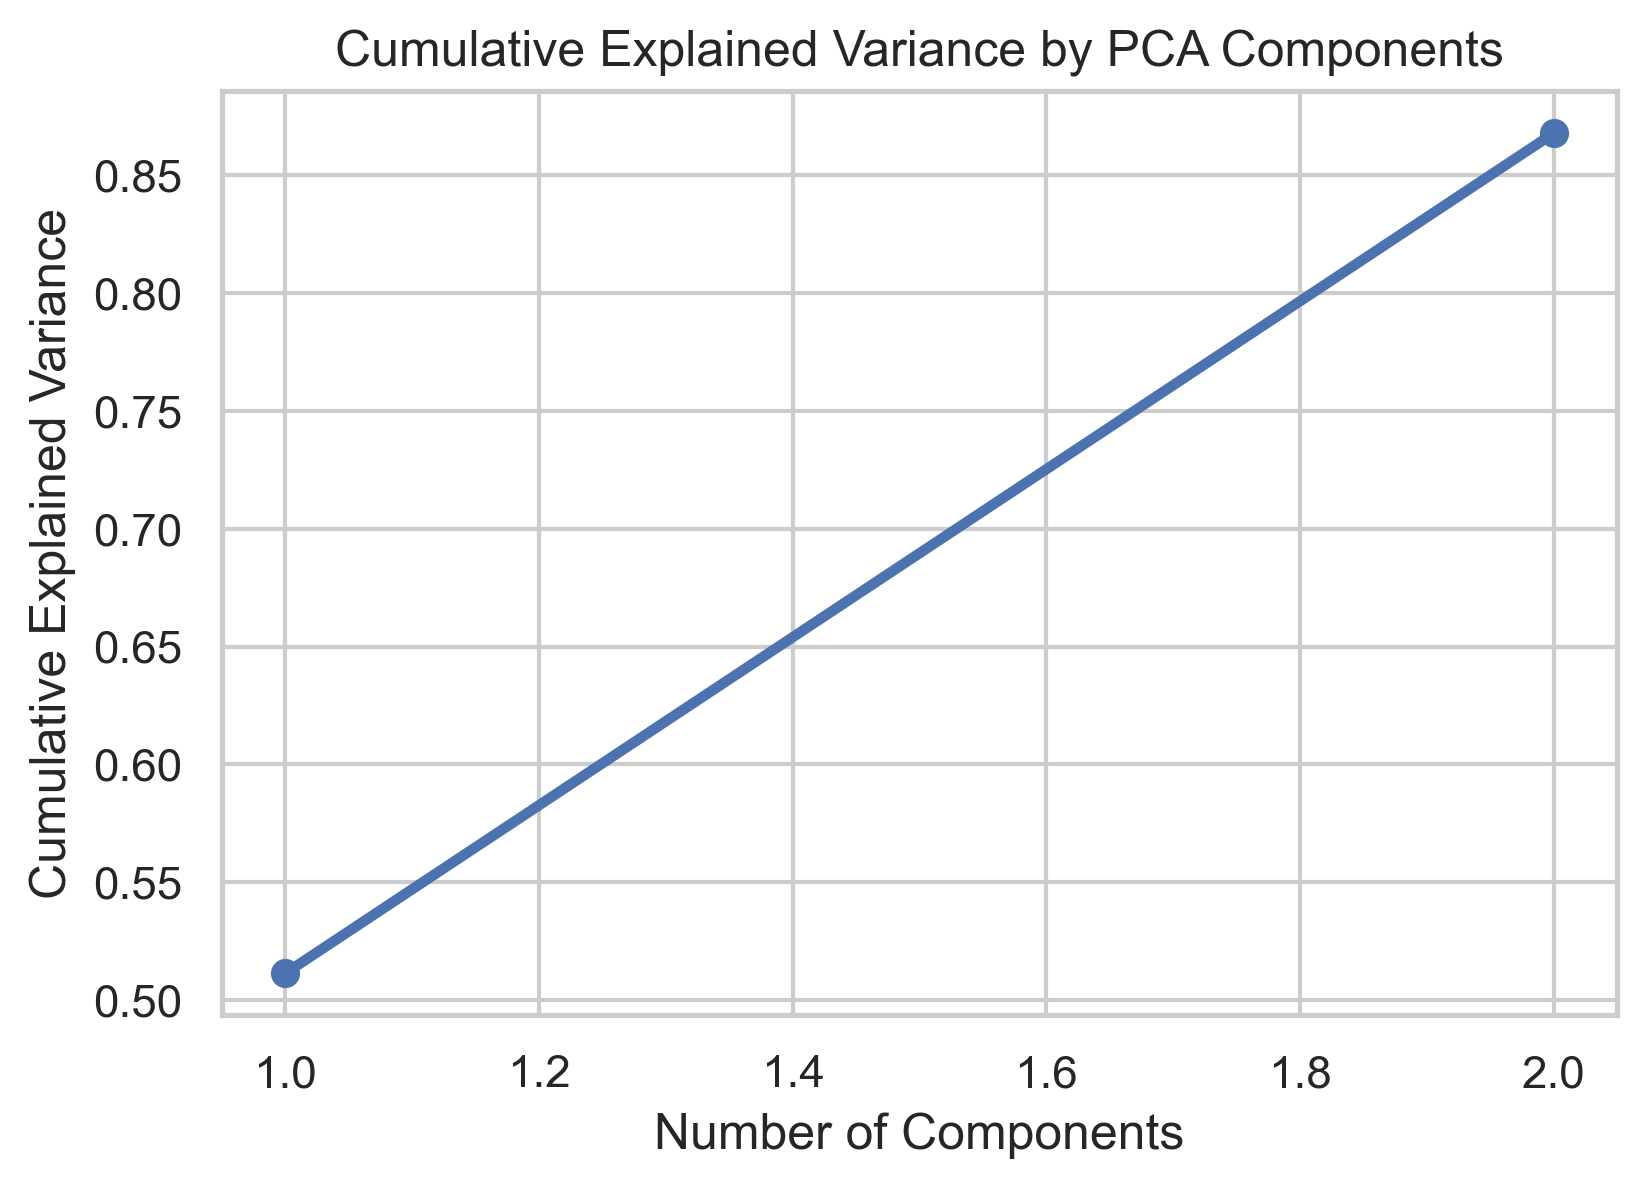

Explained variance (PC1+PC2): 86.79%


In [394]:
# (Added) PCA Explained Variance (helps justify using 2D PCA for DBSCAN visualization)
if "pca" in globals() and hasattr(pca, "explained_variance_ratio_"):
    evr = np.array(pca.explained_variance_ratio_)
    plt.figure(figsize=(6,4))
    plt.plot(np.arange(1, len(evr)+1), np.cumsum(evr), marker="o")
    plt.title("Cumulative Explained Variance by PCA Components")
    plt.xlabel("Number of Components")
    plt.ylabel("Cumulative Explained Variance")
    plt.grid(True)
    plt.show()

    print(f"Explained variance (PC1+PC2): {(evr[:2].sum()*100):.2f}%")
else:
    print("PCA object 'pca' not found. (This is OK if you created PCA with a different variable name.)")


In [395]:
# ================================
# Section 7.2: Cluster Counts
# ================================

unique, counts = np.unique(dbscan_labels, return_counts=True)

cluster_distribution = pd.DataFrame({
    "Cluster Label": unique,
    "Number of Points": counts
})

cluster_distribution


Cluster Label  Number of Points
0             -1               146
1              0              8372
2              1                 5

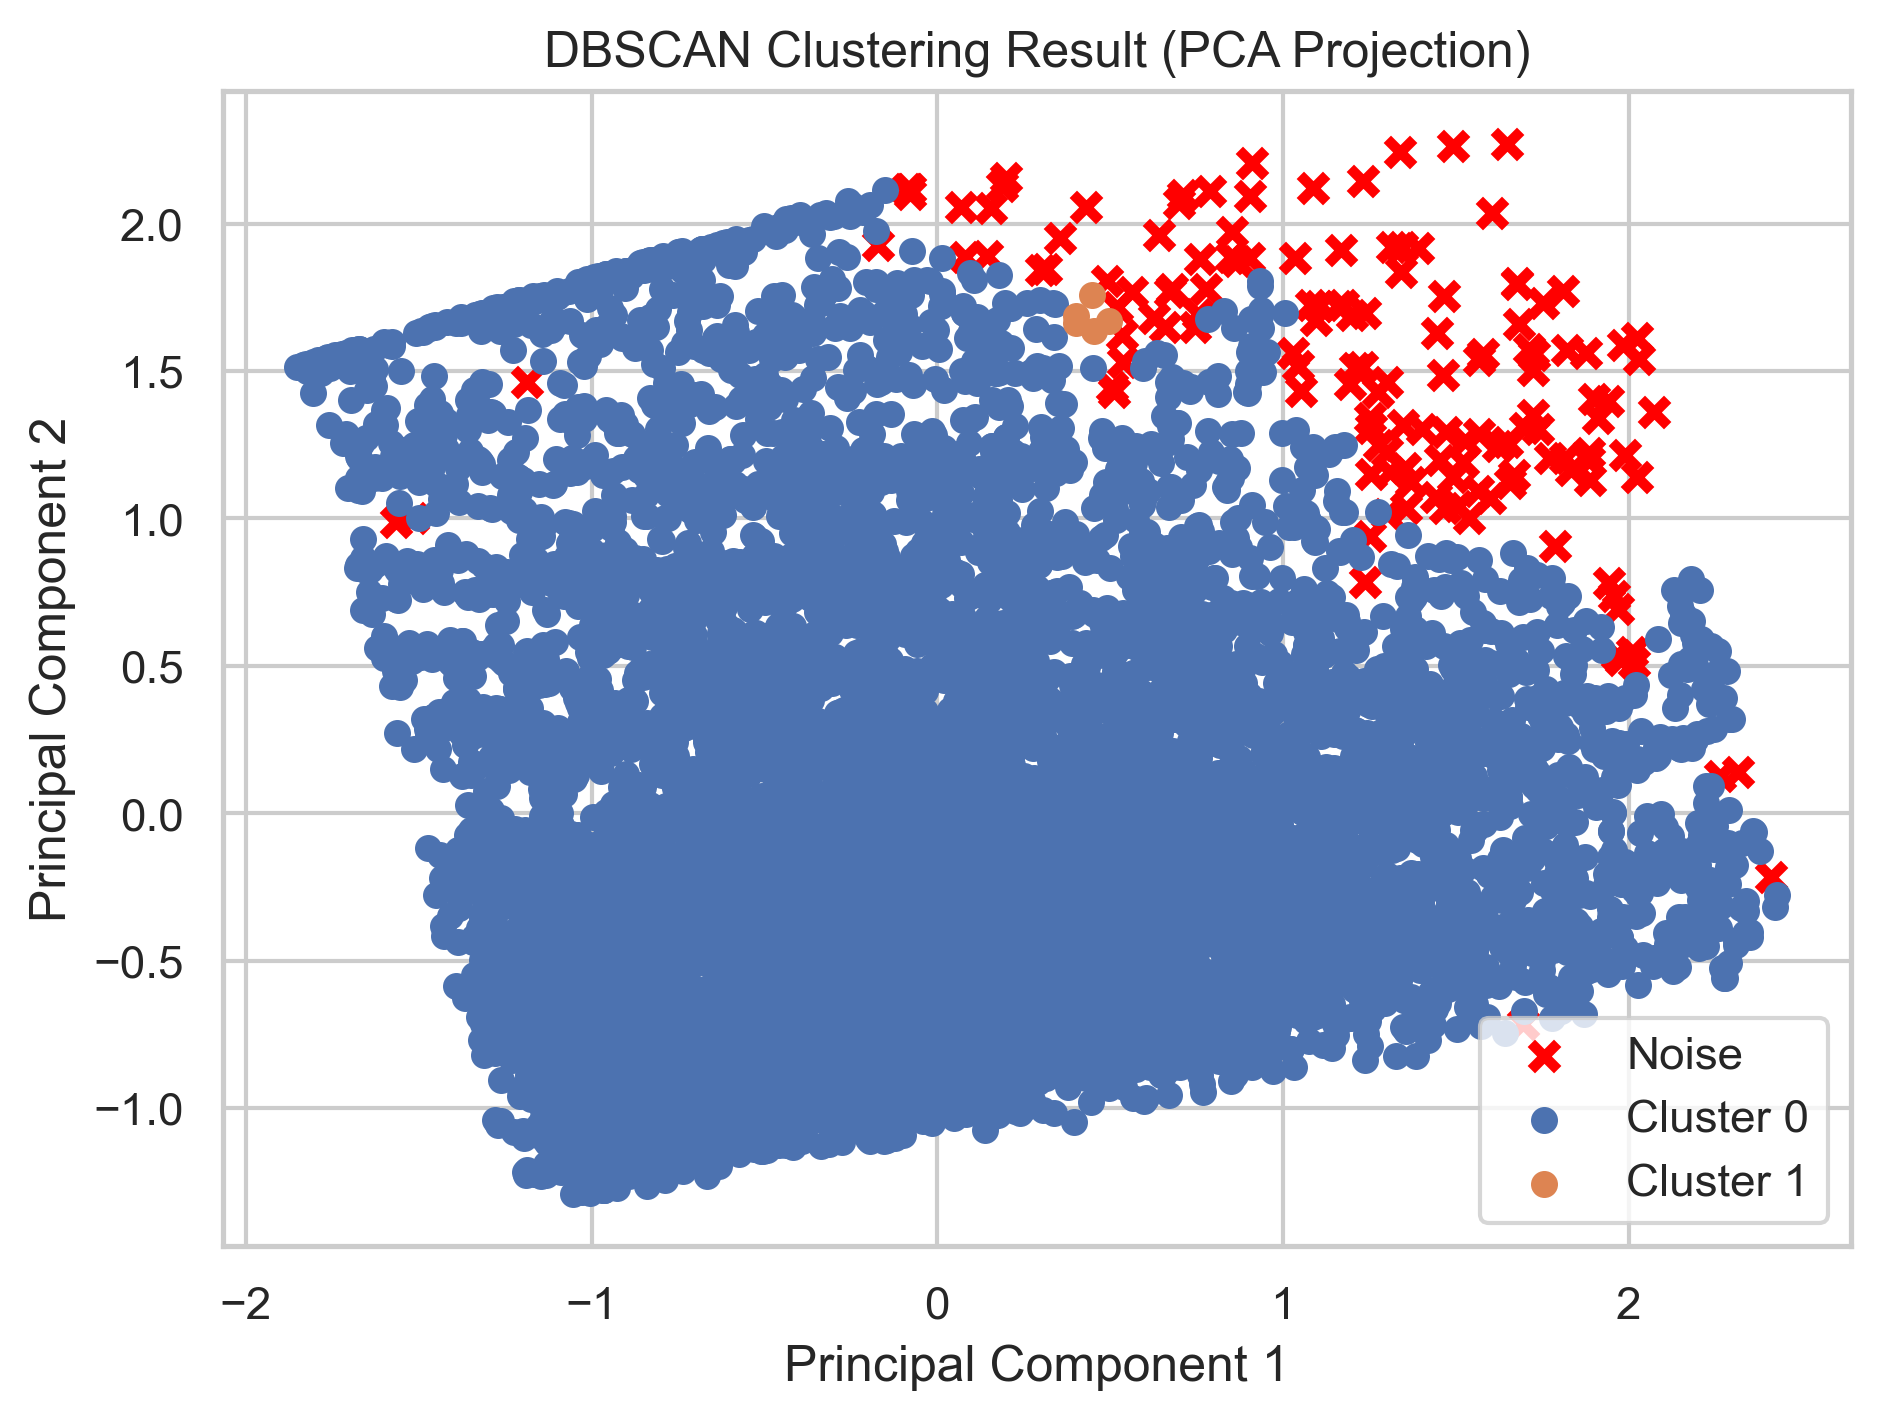

In [396]:
# ================================
# Section 7.3: DBSCAN PCA Visualization
# ================================

plt.figure(figsize=(7, 5))

unique_labels = np.unique(dbscan_labels)

for label in unique_labels:
    if label == -1:
        plt.scatter(
            X_pca[dbscan_labels == label, 0],
            X_pca[dbscan_labels == label, 1],
            c="red",
            marker="x",
            s=40,
            label="Noise"
        )
    else:
        plt.scatter(
            X_pca[dbscan_labels == label, 0],
            X_pca[dbscan_labels == label, 1],
            s=30,
            label=f"Cluster {label}"
        )

plt.title("DBSCAN Clustering Result (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()


In [397]:
# ================================
# Section 8.2: Remove Noise Points
# ================================

mask = dbscan_labels != -1

X_pca_clean = X_pca[mask]
labels_clean = dbscan_labels[mask]

print("Points used for evaluation:", X_pca_clean.shape[0])
print("Number of clusters (excluding noise):", len(np.unique(labels_clean)))



Points used for evaluation: 8377
Number of clusters (excluding noise): 2


In [398]:
# ================================
# Section 8.3: Silhouette Score
# ================================

if len(np.unique(labels_clean)) > 1:
    sil_score = silhouette_score(X_pca_clean, labels_clean)
    print(f"Silhouette Score: {sil_score:.3f}")
else:
    sil_score = None
    print("Silhouette Score cannot be computed (only one cluster detected).")


Silhouette Score: 0.248


In [399]:
# ================================
# Section 8.4: Davies–Bouldin Index
# ================================

if len(np.unique(labels_clean)) > 1:
    db_score = davies_bouldin_score(X_pca_clean, labels_clean)
    print(f"Davies–Bouldin Index: {db_score:.3f}")
else:
    db_score = None
    print("Davies–Bouldin Index cannot be computed (only one cluster detected).")


Davies–Bouldin Index: 0.600


### Final DBSCAN Evaluation Scores

After parameter tuning, the value **ε = 0.3** was selected as the optimal
DBSCAN parameter because it produced multiple meaningful clusters.

The clustering quality is evaluated using internal validation metrics
after excluding noise points.


### Evaluation Summary

The clustering quality is assessed using internal validation metrics.

- A **higher Silhouette Score** indicates better cluster separation
- A **lower Davies–Bouldin Index** indicates more compact and distinct clusters

These metrics confirm whether the selected DBSCAN parameters
produce meaningful clustering results.


## Section 9: DBSCAN Parameter Tuning

### Purpose of This Section
The performance of DBSCAN is highly sensitive to the choice of parameters,
especially **eps** and **min_samples**.

In this section, we perform a controlled parameter tuning process to:
- Explore different values of eps
- Evaluate clustering quality using Silhouette Score
- Select the parameter combination that yields the best clustering performance

This process ensures that the final model configuration is
**data-driven and not chosen arbitrarily**.


### Tuning eps Parameter

We test multiple values of ε (epsilon) and evaluate each configuration
using the Silhouette Score and Davies–Bouldin Index.

The configuration with:
- **Highest Silhouette Score**
- **Lowest Davies–Bouldin Index**

is selected as the final DBSCAN model.


In [404]:
# ================================
# Section 9.2: eps Tuning
# ================================

eps_values = [0.1,0.3, 0.4, 0.5, 0.6, 0.7]

tuning_results = []

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=8)
    labels = db.fit_predict(X_pca)

    # Exclude noise
    mask = labels != -1
    labels_clean = labels[mask]
    X_clean = X_pca[mask]

    # Compute metrics only if more than one cluster exists
    if len(np.unique(labels_clean)) > 1:
        sil = silhouette_score(X_pca_clean, labels_clean)
        dbi = davies_bouldin_score(X_pca_clean, labels_clean)

        tuning_results.append({
            "eps": eps,
            "Silhouette": sil,
            "Davies-Bouldin": dbi,
            "Clusters": len(np.unique(labels_clean))
        })

        print(f"eps={eps} -> Silhouette={sil:.3f}, DBI={dbi:.3f}")
    else:
        print(f"eps={eps} -> Only one cluster detected")


eps=0.1 -> Silhouette=0.248, DBI=0.600
eps=0.3 -> Only one cluster detected
eps=0.4 -> Only one cluster detected
eps=0.5 -> Only one cluster detected
eps=0.6 -> Only one cluster detected
eps=0.7 -> Only one cluster detected


### Parameter Tuning Results

The table below summarizes the clustering performance for different
values of ε.

The optimal parameter is selected based on clustering quality metrics.


In [406]:
# ================================
# Section 9.3: Tuning Results Table
# ================================

tuning_df = pd.DataFrame(tuning_results)
tuning_df


eps  Silhouette  Davies-Bouldin  Clusters
0  0.1    0.247768         0.59998         2

### Best Parameter Selection

Based on the tuning results, we select the value of ε that provides
the best balance between cluster separation and compactness.


In [408]:
# ================================
# Section 9.4: Select Best eps
# ================================

best_row = tuning_df.sort_values(
    by=["Silhouette", "Davies-Bouldin"],
    ascending=[False, True]
).iloc[0]

best_eps = best_row["eps"]

print("Best eps selected:", best_eps)
print(best_row)


Best eps selected: 0.1
eps               0.100000
Silhouette        0.247768
Davies-Bouldin    0.599980
Clusters          2.000000
Name: 0, dtype: float64


### Final DBSCAN Model

Using the optimal value of ε obtained from the tuning process,
we retrain DBSCAN to produce the final clustering result.


In [410]:
from sklearn.decomposition import PCA

pca_2d = PCA(n_components=2, random_state=42)
X_pca_2d = pca_2d.fit_transform(df[num_cols])





In [411]:
# ================================
# Section 9.5: Final DBSCAN Model
# ================================

from sklearn.cluster import DBSCAN

final_dbscan = DBSCAN(eps=0.1, min_samples=5)
dbscan_labels = final_dbscan.fit_predict(X_pca_2d)

unique_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print("DBSCAN clusters (excluding noise):", unique_clusters)
print("Noise points:", np.sum(dbscan_labels == -1))




DBSCAN clusters (excluding noise): 3
Noise points: 62


In [412]:
df_results = df.copy()

# إضافة أعمدة KMeans و DBSCAN
df_results['KMeans_Labels'] = kmeans_labels
df_results['DBSCAN_Labels'] = dbscan_labels

print("Models trained successfully")
display(df_results[['KMeans_Labels', 'DBSCAN_Labels']].head())
print("\nCluster distribution (KMeans):")
print(df_results['KMeans_Labels'].value_counts())
print("\nCluster distribution (DBSCAN):")
print(df_results['DBSCAN_Labels'].value_counts())


Models trained successfully


KMeans_Labels  DBSCAN_Labels
0              0              0
1              1              0
2              3              0
3              3              0
4              1              0


Cluster distribution (KMeans):
KMeans_Labels
1    2711
3    2604
2    1744
0    1464
Name: count, dtype: int64

Cluster distribution (DBSCAN):
DBSCAN_Labels
 0    8452
-1      62
 1       6
 2       3
Name: count, dtype: int64


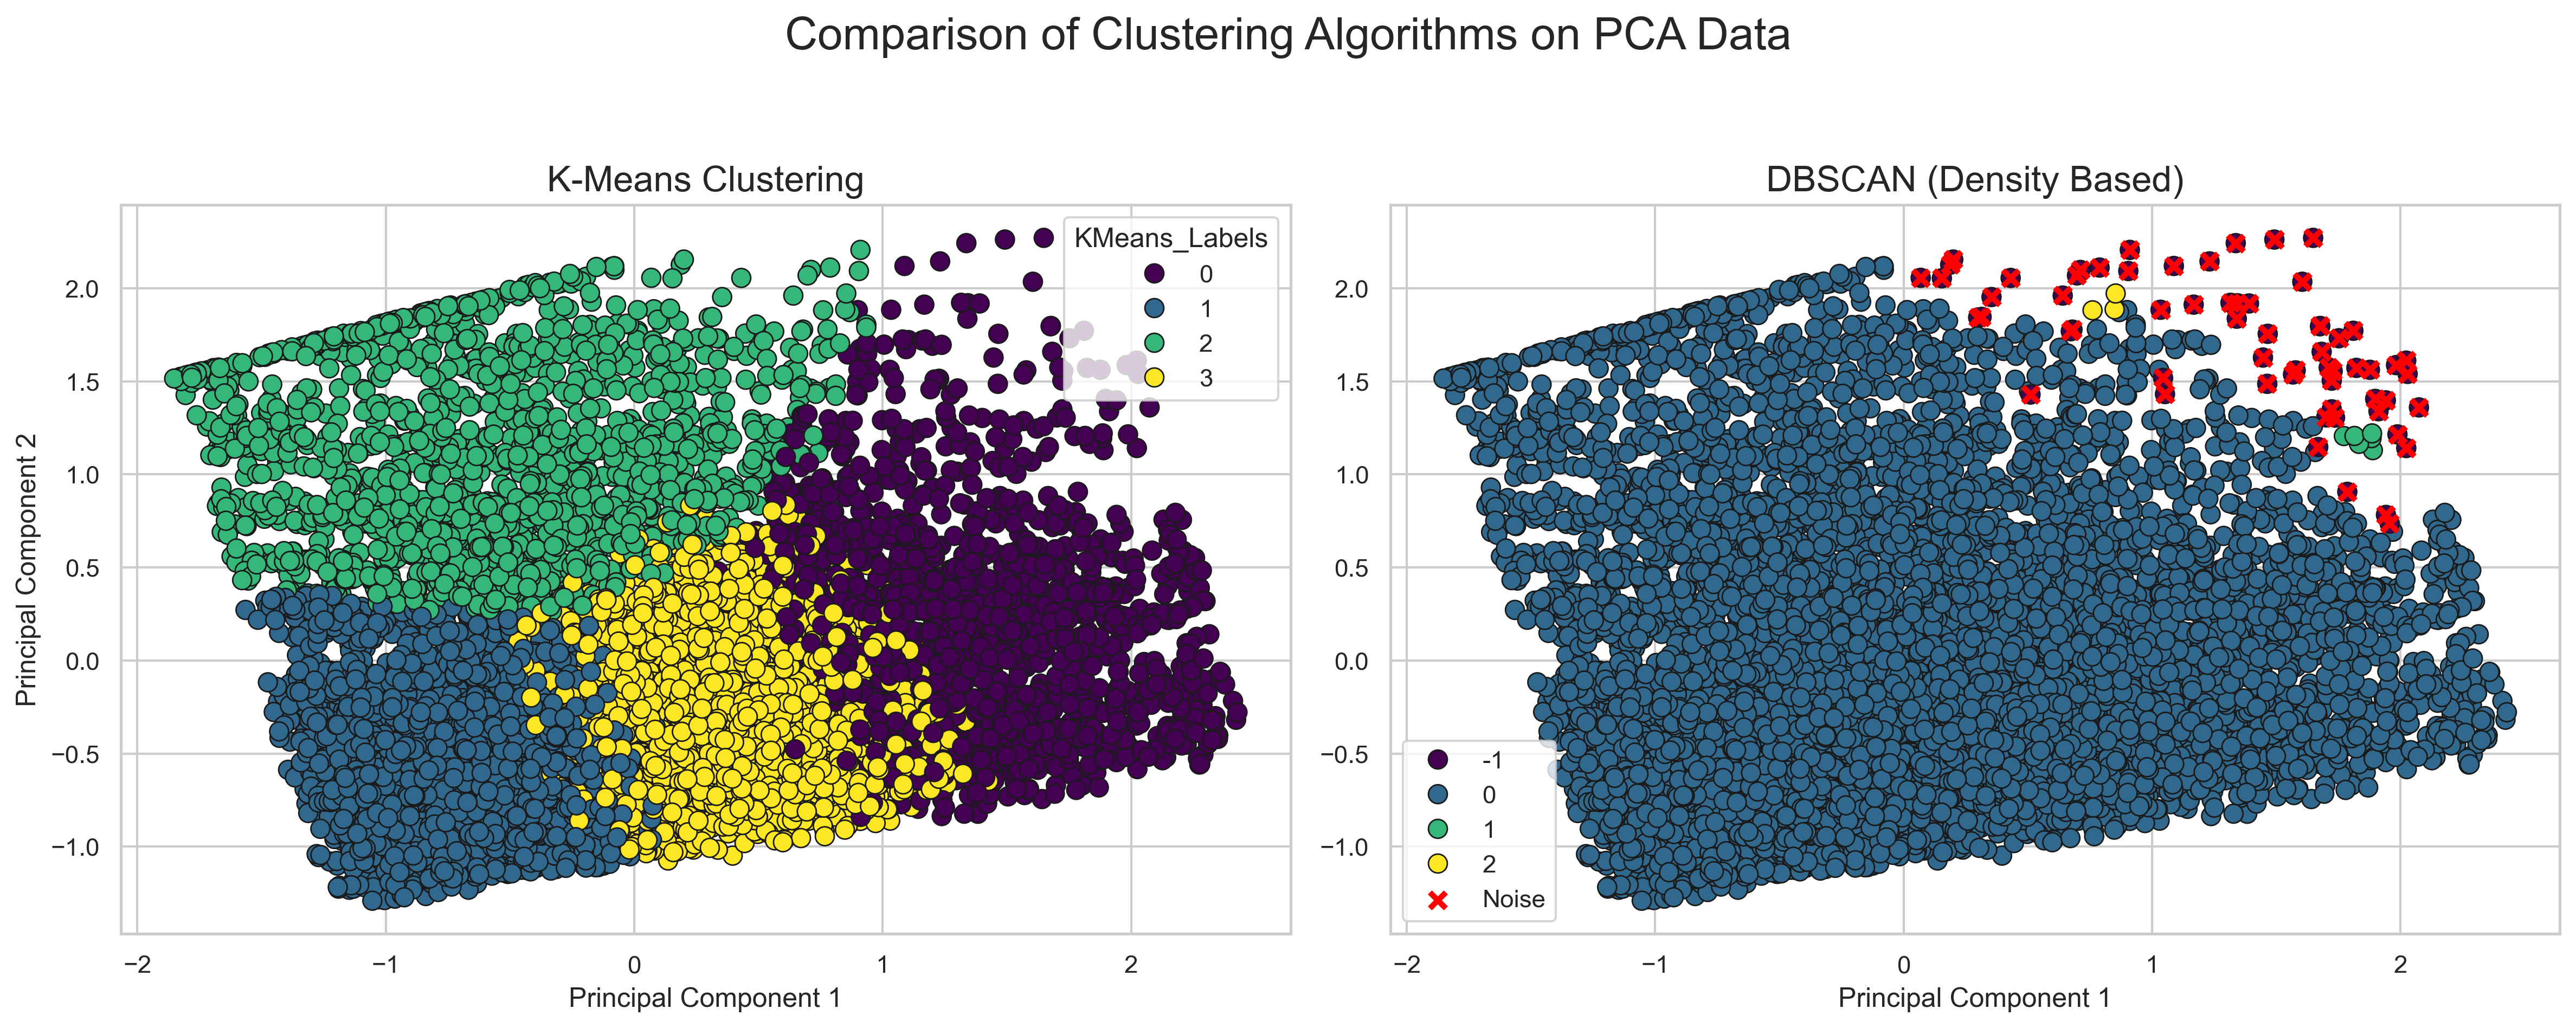

In [413]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- استخدمي نفس الـ PCA اللي شغال عليه ---
x_axis = X_pca[:, 0]  # أو X_pca_95[:,0] لو شغالة على 95% PCA
y_axis = X_pca[:, 1]  # أو X_pca_95[:,1]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# قائمة للموديلات والعناوين
models_plot = [
    (df_results['KMeans_Labels'], 'K-Means Clustering'),
    (df_results['DBSCAN_Labels'], 'DBSCAN (Density Based)')
]

for i, (labels, title) in enumerate(models_plot):
    # رسم النقاط وتلوينها حسب clusters
    sns.scatterplot(x=x_axis, y=y_axis, hue=labels, palette='viridis',
                    ax=axes[i], s=70, edgecolor='k', legend='full')
    
    axes[i].set_title(title, fontsize=16)
    axes[i].set_xlabel('Principal Component 1')
    
    # تمييز الـ Noise في DBSCAN (عادة يكون -1)
    if 'DBSCAN' in title:
        noise_points = (labels == -1)
        if noise_points.any():
            axes[i].scatter(x_axis[noise_points], y_axis[noise_points],
                            color='red', s=50, marker='x', label='Noise')
            axes[i].legend()

axes[0].set_ylabel('Principal Component 2')
plt.suptitle('Comparison of Clustering Algorithms on PCA Data', fontsize=20, y=1.05)
plt.tight_layout()
plt.show()


In [414]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np
import pandas as pd

def metrics_for(labels, X, is_dbscan=False):
    labels = np.asarray(labels)
    if is_dbscan:
        mask = labels != -1
        X_m = X[mask]
        y_m = labels[mask]
        n_noise = int(np.sum(labels == -1))
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    else:
        X_m = X
        y_m = labels
        n_noise = 0
        n_clusters = len(set(labels))

    if len(np.unique(y_m)) < 2 or len(y_m) < 2:
        return n_clusters, n_noise, np.nan, np.nan, np.nan

    return (
        n_clusters,
        n_noise,
        float(silhouette_score(X_m, y_m)),
        float(davies_bouldin_score(X_m, y_m))
    )

rows = []
rows.append(("K-Means",) + metrics_for(kmeans_labels, X_pca_95, is_dbscan=False))
rows.append(("DBSCAN",) + metrics_for(dbscan_labels, X_pca_95, is_dbscan=True))

comparison = pd.DataFrame(
    rows,
    columns=["Model", "#Clusters", "#Noise", "Silhouette", "Davies-Bouldin"]
)
display(comparison)

Model  #Clusters  #Noise  Silhouette  Davies-Bouldin
0  K-Means          4       0    0.306352        1.067668
1   DBSCAN          3      62    0.246547        0.608371

### Conclusion ⚡
After applying fair preprocessing and PCA, K-Means achieved higher internal validation scores
(Silhouette, Davies–Bouldin, and Calinski–Harabasz) compared to DBSCAN.
This indicates that the dataset exhibits compact, centroid-based structure rather than
clear density-separated clusters, making K-Means more suitable for this problem.
⚡